# Table of Contents

* [Library Import](#library)
* [Data Import](#data_import)
* [Check data integrity](#data_check)
    * [No-template controls (NTC's)](#ntc)
    * [Failed samples](#fail)  
    * [Outlier identification with reference genes](#outliers)
    * [Check reference genes](#ref_genes)
    * [Target genes](#target_genes)
        * [Calculate ΔCq & 2^-ΔCq](#delta_Cq)
        * [Plot genes](#target_plots)

# Library import<a class="anchor" id="library"></a>

In [ ]:
# pip install scikit_posthocs
# pip install researchpy

In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import re

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Import plot libraries
import matplotlib as mpl
import matplotlib.pyplot as pp
import seaborn as sb

# Set custom design for plots
%matplotlib inline
IPython_default = pp.rcParams.copy()
from matplotlib import rc, cycler
colors = cycler('color', 
                 ['#EE6666', # bright red
                  '#941111', # dark red
                  '#66EEEE', # bright blue  
                  '#022869', # dark blue 
                  '#9988DD', # purple 
                  '#6950cd', # dark purple
                  '#88BB44', # green 
                 '#6d9636']) # dark green


mpl.rcParams['font.family'] = 'Arial'
params = {'figure.figsize': (14, 12),
         'axes.labelsize': 20,
         'axes.titlesize': 32,
         'xtick.labelsize':18,
         'ytick.labelsize':18,
         'legend.fontsize': 20,
         'legend.title_fontsize': 'xx-large',
         'axes.facecolor': '#FFFFFF',
         'axes.axisbelow': 'True',
         'axes.grid': 'False',
         'axes.prop_cycle': colors,
         'lines.linewidth': 2}
mpl.rcParams.update(params)


# Statistics
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc
from scipy.stats.mstats import gmean

# Reading in the data <a class="anchor" id="data_import"></a>

Each plate imported as individual csv file.

**Notes:**
- Imported as CSV files in Norwegian, so delimiter is ";" and decimal is "," whereas some files were edited on a US computer, so decimal is still "," but the delimiter is no longer ";".
- Group 1 contains clones (N2 and I1), run in 2020
- Group 2 contains clonse (N13 and I4), run in 2021

- Plates 48, 49, 50 (PRR5 for group 2) failed, re-done in 2022 as plates 64, 65, 66

### Biological Replicate 1 <a class="anchor" id="Biological_Replicate_1"></a>

In [39]:
# Group 1
LHY_1 = pd.read_csv(Path("plate1_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_1 = pd.read_csv(Path("plate2_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_1 = pd.read_csv(Path("plate4_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_1 = pd.read_csv(Path("plate5_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_1 = pd.read_csv(Path("plate6_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_1 = pd.read_csv(Path("plate19_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR7_1 = pd.read_csv(Path("plate21_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR5_1 = pd.read_csv(Path("plate24_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_1 = pd.read_csv(Path("plate27_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_1 = pd.read_csv(Path("plate30_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

# Group 2
LHY_4 = pd.read_csv(Path("plate33_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_4 = pd.read_csv(Path("plate60_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_4 = pd.read_csv(Path("plate39_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_4 = pd.read_csv(Path("plate57_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_4 = pd.read_csv(Path("plate45_Cq_Results.csv"), decimal=",",index_col=1) 
LUX_4 = pd.read_csv(Path("plate54_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_4 = pd.read_csv(Path("plate42_Cq_Results.csv"), decimal=",",index_col=1)
PRR5_4 = pd.read_csv(Path("plate64_Cq_Results.csv"), delimiter=";",index_col=1)
RVE8_4 = pd.read_csv(Path("plate36_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_4 = pd.read_csv(Path("plate51_Cq_Results.csv"), decimal=",",index_col=1)

### Biological Replicate 2 <a class="anchor" id="Biological_Replicate_2"></a>

In [40]:
# Group 1
LHY_2 = pd.read_csv(Path("plate7_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_2 = pd.read_csv(Path("plate8_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_2 = pd.read_csv(Path("plate10_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_2 = pd.read_csv(Path("plate11_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_2 = pd.read_csv(Path("plate12_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_2 = pd.read_csv(Path("plate20_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_2 = pd.read_csv(Path("plate22_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_2 = pd.read_csv(Path("plate25_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_2 = pd.read_csv(Path("plate28_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_2 = pd.read_csv(Path("plate31_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_5 = pd.read_csv(Path("plate34_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_5 = pd.read_csv(Path("plate61_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_5 = pd.read_csv(Path("plate40_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_5 = pd.read_csv(Path("plate58_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_5 = pd.read_csv(Path("plate46_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_5 = pd.read_csv(Path("plate55_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_5 = pd.read_csv(Path("plate43_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR5_5 = pd.read_csv(Path("plate65_Cq_Results.csv"), delimiter=";",index_col=1)
RVE8_5 = pd.read_csv(Path("plate37_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_5 = pd.read_csv(Path("plate52_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

### Biological Replicate 3 <a class="anchor" id="Biological_Replicate_3"></a>

In [41]:
# Group 1
LHY_3 = pd.read_csv(Path("plate13_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_3 = pd.read_csv(Path("plate14_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_3 = pd.read_csv(Path("plate15_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_3 = pd.read_csv(Path("plate16_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_3 = pd.read_csv(Path("plate17_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_3 = pd.read_csv(Path("plate18_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_3 = pd.read_csv(Path("plate23_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_3 = pd.read_csv(Path("plate26_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
RVE8_3 = pd.read_csv(Path("plate29_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_3 = pd.read_csv(Path("plate32_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_6 = pd.read_csv(Path("plate35_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_6 = pd.read_csv(Path("plate62_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_6 = pd.read_csv(Path("plate41_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_extra_6 = pd.read_csv(Path("plate50_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_6 = pd.read_csv(Path("plate59_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_6 = pd.read_csv(Path("plate47_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_6 = pd.read_csv(Path("plate56_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_6 = pd.read_csv(Path("plate44_Cq_Results.csv"), decimal=",",index_col=1)
PRR5_6 = pd.read_csv(Path("plate66_Cq_Results.csv"),delimiter=";",index_col=1)
RVE8_6 = pd.read_csv(Path("plate38_Cq_Results.csv"), decimal=",",index_col=1)
TOC1_6 = pd.read_csv(Path("plate53_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

### Data merge

In [42]:
genes_br_1 = [LHY_1, GAPDH_1, PRR9_1, PRDX_1, MSI1_1, LUX_1, PRR7_1, PRR5_1, RVE8_1, TOC1_1, LHY_4, RVE8_4, PRR9_4, PRR7_4, PRR5_4, MSI1_4, TOC1_4, LUX_4, GAPDH_4, PRDX_4]

genes_br_2 = [LHY_2, GAPDH_2, PRR9_2, PRDX_2, MSI1_2, LUX_2, PRR7_2, PRR5_2, RVE8_2, TOC1_2, LHY_5, RVE8_5, PRR9_5, PRR7_5, PRR5_5, MSI1_5, TOC1_5, LUX_5, PRDX_5, GAPDH_5]

genes_br_3 = [LHY_3, GAPDH_3, LUX_3, PRR9_3, PRDX_3, MSI1_3, PRR7_3, PRR5_3, RVE8_3, TOC1_3, LHY_6, RVE8_6, PRR9_6, PRR7_6, PRR5_6, MSI1_6, TOC1_6, LUX_6, PRDX_6, GAPDH_6, PRR9_extra_6]

In [43]:
br_1 = pd.concat(genes_br_1)
br_2 = pd.concat(genes_br_2)
br_3 = pd.concat(genes_br_3)

#### Dataframe cleanup

* Drop all unneccessary columns
* Replace Sample "NaN" with "NTC"
* Replace Cq "NaN" with 0
* Replace "GADPH" with "GAPDH" (typo)
* Change Target "IRC" from "GAPDH" to "IRC" for IRC samples

In [44]:
br_1.reset_index(inplace = True)
br_1.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# replace sample NaN name's with NTC
br_1["Sample"] = br_1["Sample"].replace(np.nan, "NTC") 
br_1["Sample"] = br_1["Sample"].replace("BLANK", "NTC") 

# replace Cq NaN values with 0
br_1["Cq"] = br_1["Cq"].replace(np.nan, 0) 

 # rename misnamed target's
br_1["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)

# set replicate number for future merged dataframe
br_1['Replicate'] = '1' 

# Set order of columns
br_1 = br_1[['Sample', 'Replicate', 'Target', 'Cq']]

#rename IRC targets for separate use
br_1.loc[br_1["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_1.loc[br_1["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_1.loc[br_1["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"


In [45]:
br_1.loc[br_1['Sample'] == 'I4_3B'] 

,Sample,Replicate,Target,Cq
854,I4_3B,1,LHY,28.967996
935,I4_3B,1,RVE8,28.439062
1015,I4_3B,1,PRR9,25.922230
1095,I4_3B,1,PRR7,26.273794
1175,I4_3B,1,PRR5,24.710000
1252,I4_3B,1,MSI1,29.318290
1284,I4_3B,1,MSI1,0.000000
1331,I4_3B,1,TOC1,28.393389
1410,I4_3B,1,LUX,29.706691
1489,I4_3B,1,GAPDH,22.861219


In [46]:
# Plate mistakes: Re-did I4_3B_1 MSI1 (plate 45) in well G7, delete the other cell
br_1.drop(1206, axis=0, inplace = True)

In [47]:
br_2.reset_index(inplace = True)
br_2.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_2["Sample"] = br_2["Sample"].replace(np.nan, "NTC")
br_2["Sample"] = br_2["Sample"].replace("BLANK", "NTC")
br_2["Cq"] = br_2["Cq"].replace(np.nan, 0)
br_2["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_2['Replicate'] = '2'
br_2 = br_2[['Sample', 'Replicate', 'Target', 'Cq']]
br_2.loc[br_2["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_2.loc[br_2["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_2.loc[br_2["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

In [48]:
br_2.loc[850, :]

Sample         I4_2B_1
Replicate            2
Target             NaN
Cq           26.357008
Name: 850, dtype: object

In [49]:
# Plate mistakes: Dont need this sample, accidental re-make
br_2.drop(850, axis=0, inplace=True)

In [50]:
br_3.reset_index(inplace = True)
br_3.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_3["Sample"] = br_3["Sample"].replace(np.nan, "NTC")
br_3["Sample"] = br_3["Sample"].replace("BLANK", "NTC")
br_3["Cq"] = br_3["Cq"].replace(np.nan, 0)
br_3["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_3['Replicate'] = '3'
br_3 = br_3[['Sample', 'Replicate', 'Target', 'Cq']]
br_3.loc[br_3["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_3.loc[br_3["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_3.loc[br_3["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

### Group all data in one dataframe

In [51]:
replicates = [br_1, br_2, br_3]
data = pd.concat(replicates, ignore_index = True)
data

,Sample,Replicate,Target,Cq
0,N2_1A,1,LHY,23.972973
1,N2_2A,1,LHY,22.608713
2,N2_1B,1,LHY,22.410477
3,N2_2B,1,LHY,23.546714
4,N2_3A,1,LHY,21.134845
...,...,...,...,...
4723,I4_13D,3,PRR9,30.051217
4724,NTC,3,PRR9,39.440899
4725,IRC1_50,3,IRC1,21.016340
4726,IRC2_50,3,IRC2,21.970216


Pull out IRC's for separate use

In [52]:
data = data[~data.Sample.str.contains('IRC')]

Set column names for sample ID variables using dictionary

In [53]:
sampleID_treatment = {"A": "Norway", 
                      "B": "Italy", 
                      "C": "D-Norway", 
                      "D": "D-Italy"}

sampleID_zeitgeber = {"_1": "0", "_2": "4", "_3": "8", 
                      "_4": "12", "_5": "16", "_6": "20", 
                      "_7": "24", "_8": "28", "_9": "32", 
                      "_10": "36", "_11": "40", "_12": "44", 
                      "_13": "48"}

sampleID_Clone = {"I1": "IT1", "I4": "IT4", "N2": "NOR2", "N13": "NOR13"}

In [54]:
data['treatment']= data.Sample.apply(lambda x : 
                                     ''.join([v if k in x  else '' for k,v in sampleID_treatment.items()]))

data['zeitgeber'] = data.Sample.apply(lambda x : 
                                      ''.join([v if k in x  else '' for k,v in sampleID_zeitgeber.items()]))

data['Clone'] = data.Sample.apply(lambda x : 
                                  ''.join([v if k in x  else '' for k,v in sampleID_Clone.items()]))

data['Clone_origin'] = data['Clone'].str.extract(r'([I|N])', expand = False)

data.sort_values(by=['Clone', 'treatment'], ascending = (True, False), inplace = True)

In [55]:
data.describe()

,Cq
count,4565.000000
mean,26.510188
std,6.086401
min,0.000000
25%,24.549344
50%,27.444216
75%,29.451303
max,41.931212


# Check data integrity <a class="anchor" id="data_check"></a>

### No-template controls (NTC) <a class="anchor" id="ntc"></a>

Check NTC > 0

(Validate further by melt curves)

In [56]:
data.loc[(data['Sample']=='NTC') & (data['Cq'] > 0)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
1025,NTC,1,PRR9,35.105059,D-Norway,,,NaN
1048,NTC,1,PRR9,39.139342,D-Norway,,,NaN
1340,NTC,1,TOC1,36.279197,D-Norway,,,NaN
1573,NTC,1,PRDX,37.749753,D-Norway,,,NaN
1793,NTC,2,PRR9,36.559262,D-Norway,,,NaN
3610,NTC,3,MSI1,39.274383,D-Norway,,,NaN
4043,NTC,3,RVE8,26.898251,D-Norway,,,NaN
4238,NTC,3,PRR7,41.931212,D-Norway,,,NaN
4396,NTC,3,MSI1,39.286813,D-Norway,,,NaN
4636,NTC,3,PRDX,39.010386,D-Norway,,,NaN


Cq's > 35 likely primer-dimers.

RVE8 NTC was mislabelled - Sample was re-done on a new plate.

In [57]:
data.loc[(data['Target']=='PRR9') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
1025,NTC,1,PRR9,35.105059,D-Norway,,,NaN
1048,NTC,1,PRR9,39.139342,D-Norway,,,NaN
1793,NTC,2,PRR9,36.559262,D-Norway,,,NaN
4724,NTC,3,PRR9,39.440899,D-Norway,,,NaN
236,I1_13B,1,PRR9,35.379026,Italy,048,IT1,I
1806,I1_7B,2,PRR9,38.188996,Italy,24,IT1,I
1827,I1_13B,2,PRR9,35.934719,Italy,048,IT1,I
3423,I1_6B,3,PRR9,35.795134,Italy,20,IT1,I
3447,I1_13B,3,PRR9,36.079640,Italy,048,IT1,I
237,I1_13C,1,PRR9,35.879865,D-Norway,048,IT1,I


In [60]:
data.loc[(data['Target']=='TOC1') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
1340,NTC,1,TOC1,36.279197,D-Norway,,,NaN
782,I1_8A,1,TOC1,39.310573,Norway,28,IT1,I
2333,I1_1B,2,TOC1,37.606885,Italy,0,IT1,I
1343,I4_9A,1,TOC1,35.146323,Norway,32,IT4,I
4464,I4_11A,3,TOC1,36.641713,Norway,040,IT4,I
4472,I4_13A,3,TOC1,37.684287,Norway,048,IT4,I
4473,I4_13B,3,TOC1,38.376442,Italy,048,IT4,I
4462,I4_10C,3,TOC1,37.166448,D-Norway,036,IT4,I
4470,I4_12C,3,TOC1,37.933138,D-Norway,044,IT4,I
4474,I4_13C,3,TOC1,39.026467,D-Norway,048,IT4,I


Drop NTC's

In [61]:
data = data[data.Sample != 'NTC']

## Failed wells <a class="anchor" id="fail"></a>

In [62]:
failed_wells = data.loc[data['Cq'] == 0]
failed_wells.sort_values(['Clone', 'Target'])

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
3283,I1_12A,3,GAPDH,0.0,Norway,044,IT1,I
1733,I1_12B,2,GAPDH,0.0,Italy,044,IT1,I
156,I1_13C,1,GAPDH,0.0,D-Norway,048,IT1,I
480,I1_13C,1,LUX,0.0,D-Norway,048,IT1,I
3605,I1_12D,3,MSI1,0.0,D-Italy,044,IT1,I
...,...,...,...,...,...,...,...,...
3642,N2_11C,3,PRR7,0.0,D-Norway,040,NOR2,N
3643,N2_11D,3,PRR7,0.0,D-Italy,040,NOR2,N
3803,N2_11D,3,RVE8,0.0,D-Italy,040,NOR2,N
764,N2_13B,1,TOC1,0.0,Italy,048,NOR2,N


C:\Users\cfa024\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


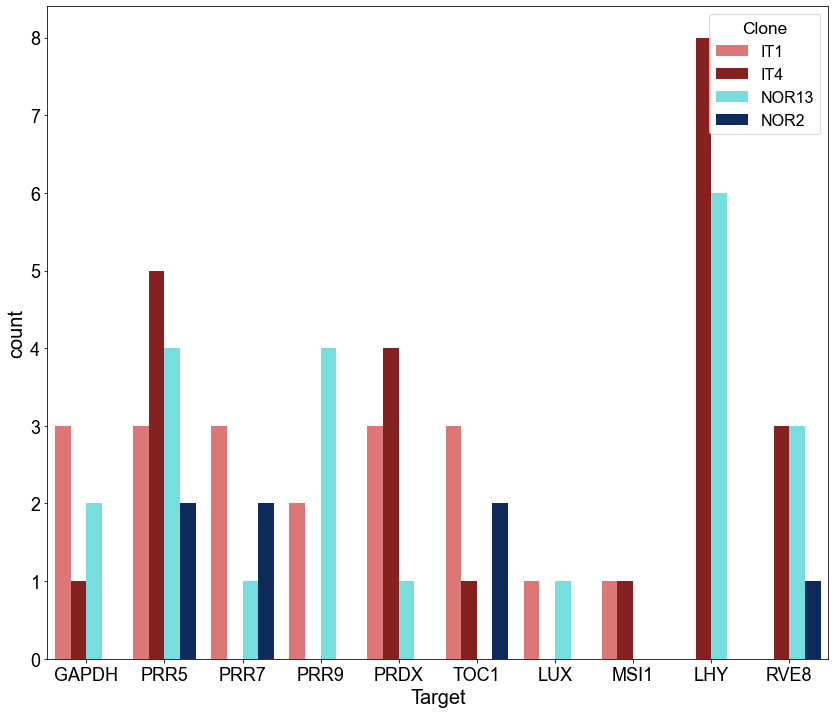

In [63]:
sb.countplot(failed_wells['Target'], hue = failed_wells['Clone'])
pp.legend(loc='upper right', title = 'Clone', fontsize=16)
pp.savefig('Circadian_gene_results_figures/Failed_wells.jpg', dpi = 300)
pp.show()

C:\Users\cfa024\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


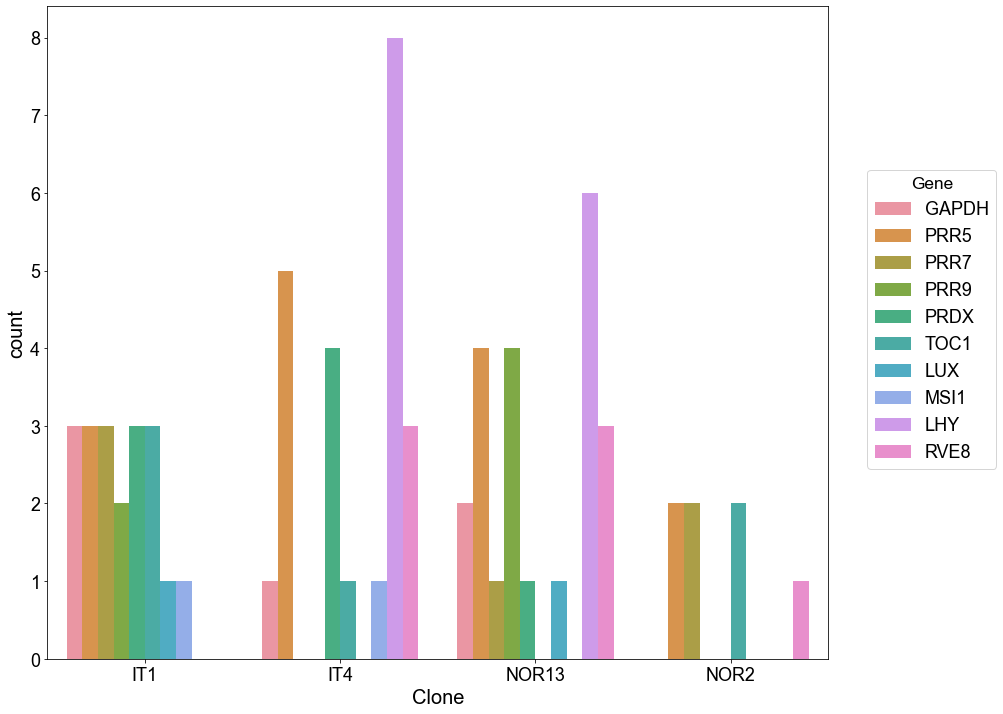

In [64]:
sb.countplot(failed_wells['Clone'], hue = failed_wells['Target'])
pp.legend(bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0., title = 'Gene', fontsize=18)

Identify samples where reference gene failed (nothing to compare to, inhibits downstream analysis)

In [65]:
failed_ref = failed_wells.loc[(failed_wells['Target'] == 'MSI1') | (failed_wells['Target'] == 'GAPDH')]
failed_ref

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
3283,I1_12A,3,GAPDH,0.0,Norway,044,IT1,I
1733,I1_12B,2,GAPDH,0.0,Italy,044,IT1,I
156,I1_13C,1,GAPDH,0.0,D-Norway,048,IT1,I
3605,I1_12D,3,MSI1,0.0,D-Italy,044,IT1,I
1283,I4_3B,1,MSI1,0.0,Italy,8,IT4,I
4716,I4_13D,3,GAPDH,0.0,D-Italy,048,IT4,I
4652,N13_7A,3,GAPDH,0.0,Norway,24,NOR13,N
4651,N13_6B,3,GAPDH,0.0,Italy,20,NOR13,N


In [66]:
drop_samps = failed_ref[['Sample', 'Replicate']]

Drop failed wells

In [67]:
data = data[data.Cq != 0]

## Identify outliers using reference genes <a class="anchor" id="outliers"></a>

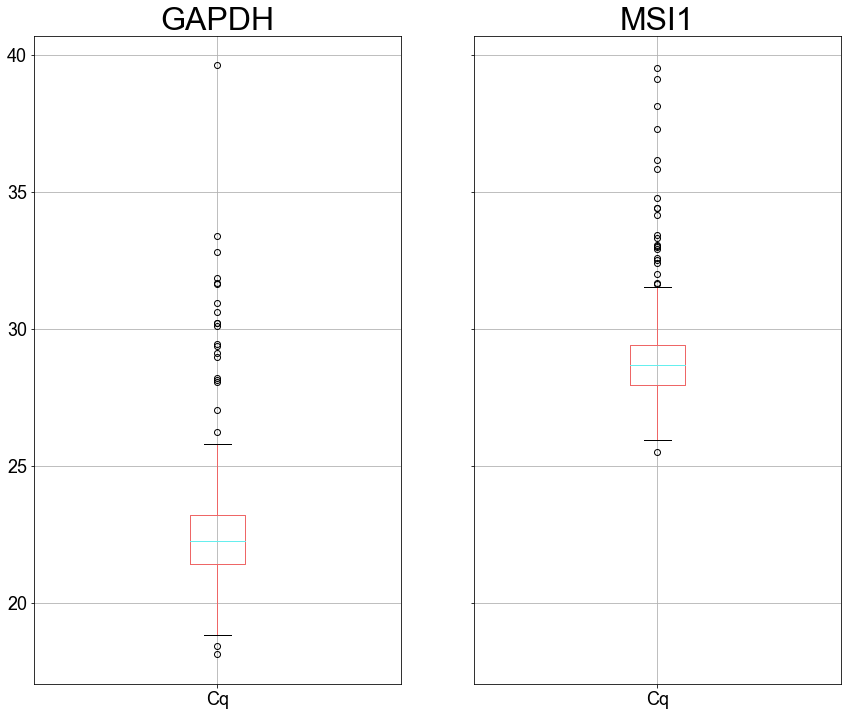

In [68]:
ref_genes = data[(data['Target']=='GAPDH') | (data['Target']=='MSI1')]

ref_genes.groupby('Target').boxplot(column='Cq')
pp.savefig('Circadian_gene_results_figures/Ref_gene_outliers.jpg', dpi = 300)
pp.show()

In [129]:
ref_genes.head()

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
120,I1_1A,1,GAPDH,21.834811,Norway,0,IT1,I
122,I1_2A,1,GAPDH,20.288447,Norway,4,IT1,I
124,I1_3A,1,GAPDH,21.397328,Norway,8,IT1,I
126,I1_4A,1,GAPDH,23.012588,Norway,12,IT1,I
128,I1_5A,1,GAPDH,22.732363,Norway,16,IT1,I


In [69]:
bygene = ref_genes.groupby(by='Target')
bygene.describe()

Cq                                                        \
        count       mean       std        min        25%        50%   
Target                                                                
GAPDH   440.0  22.591800  2.217914  18.114577  21.423183  22.265899   
MSI1    445.0  28.892576  1.695956  25.503145  27.960188  28.663441   

                              
              75%        max  
Target                        
GAPDH   23.191409  39.619334  
MSI1    29.391472  39.503811

In [70]:
GAPDH = data[data['Target']=='GAPDH']
MSI1 = data[data['Target']=='MSI1'] 

IQR method

In [71]:
def locate_outlier_IQR(df):
    Q1=df['Cq'].quantile(0.25)
    Q3=df['Cq'].quantile(0.75)
    IQR=Q3-Q1
    outliers = df.loc[(df['Cq']>(Q3+1.5*IQR))]
    return (outliers)

In [72]:
GAPDH_outliers = locate_outlier_IQR(GAPDH)
GAPDH_outliers

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
134,I1_8A,1,GAPDH,28.984997,Norway,28,IT1,I
1704,I1_1A,2,GAPDH,30.201841,Norway,0,IT1,I
1705,I1_1B,2,GAPDH,32.805041,Italy,0,IT1,I
1716,I1_7B,2,GAPDH,29.436695,Italy,24,IT1,I
1501,I4_9A,1,GAPDH,30.084437,Norway,32,IT4,I
1509,I4_11A,1,GAPDH,30.940667,Norway,040,IT4,I
3120,I4_10A,2,GAPDH,31.638719,Norway,036,IT4,I
1506,I4_10B,1,GAPDH,26.242289,Italy,036,IT4,I
3126,I4_11C,2,GAPDH,29.363604,D-Norway,040,IT4,I
4703,I4_10C,3,GAPDH,31.847880,D-Norway,036,IT4,I


In [73]:
MSI1_outliers = locate_outlier_IQR(MSI1)
MSI1_outliers

,Sample,Replicate,Target,Cq,treatment,zeitgeber,Clone,Clone_origin
377,I1_8A,1,MSI1,34.160538,Norway,28,IT1,I
1949,I1_1B,2,MSI1,37.285711,Italy,0,IT1,I
1960,I1_7B,2,MSI1,38.120442,Italy,24,IT1,I
399,I1_13C,1,MSI1,39.121616,D-Norway,048,IT1,I
400,I1_13D,1,MSI1,35.847011,D-Italy,048,IT1,I
1248,I4_2A,1,MSI1,32.391904,Norway,4,IT4,I
1263,I4_9A,1,MSI1,36.163812,Norway,32,IT4,I
1271,I4_11A,1,MSI1,32.896792,Norway,040,IT4,I
2820,I4_10A,2,MSI1,32.595807,Norway,036,IT4,I
1268,I4_10B,1,MSI1,33.028914,Italy,036,IT4,I


### Samples to be dropped

Outliers + samples where reference gene failed

In [74]:
High_GAPDH = GAPDH_outliers[['Sample', 'Replicate']]
High_MSI1 = MSI1_outliers[['Sample', 'Replicate']]

drop_refs = pd.concat([High_GAPDH, High_MSI1]).drop_duplicates().reset_index(drop=True)


# Add samples where reference genes failed, nothing to use for relative expression
drop_samples = drop_refs.append(drop_samps).drop_duplicates().reset_index(drop=True)

drop_samples.loc[drop_samples.shape[0]] = ['I4_7B', '2']
drop_samples

C:\Users\cfa024\AppData\Local\Temp\ipykernel_15112\1568602980.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drop_samples = drop_refs.append(drop_samps).drop_duplicates().reset_index(drop=True)


,Sample,Replicate
0,I1_8A,1
1,I1_1A,2
2,I1_1B,2
3,I1_7B,2
4,I4_9A,1
5,I4_11A,1
6,I4_10A,2
7,I4_10B,1
8,I4_11C,2
9,I4_10C,3


## Update dataframe

In [75]:
# merge dataframe with dropped samples to identify which are being dropped
data_update = pd.merge(data,drop_samples, on=['Sample', 'Replicate'], 
                 indicator=True, how='outer')

In [76]:
dropped = data_update[data_update['_merge']=='both']
dropped['Sample_ID'] = dropped['Sample'] + dropped['Replicate']
dropped.drop(columns = ['Sample', 'Replicate', '_merge'], inplace = True)
dropped

,Target,Cq,treatment,zeitgeber,Clone,Clone_origin,Sample_ID
71,LHY,33.183911,Norway,28,IT1,I,I1_8A1
72,GAPDH,28.984997,Norway,28,IT1,I,I1_8A1
73,PRR9,32.560917,Norway,28,IT1,I,I1_8A1
74,PRDX,29.435356,Norway,28,IT1,I,I1_8A1
75,MSI1,34.160538,Norway,28,IT1,I,I1_8A1
...,...,...,...,...,...,...,...
3958,PRDX,28.558828,Italy,12,NOR2,N,N2_4B3
3959,MSI1,33.062104,Italy,12,NOR2,N,N2_4B3
3960,PRR7,31.289686,Italy,12,NOR2,N,N2_4B3
3961,PRR5,31.862914,Italy,12,NOR2,N,N2_4B3


In [77]:
dropped_grouped = dropped.groupby('Sample_ID')
rp.summary_cont(dropped_grouped)

C:\Users\cfa024\Anaconda3\lib\site-packages\researchpy\summary.py:176: FutureWarning: ['Target', 'treatment', 'zeitgeber', 'Clone', 'Clone_origin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = group1.agg(['count', numpy.mean, numpy.std,


Cq                                             
            N     Mean      SD      SE 95% Conf.  Interval
Sample_ID                                                 
I1_12A3     9  27.5905  1.9398  0.6466   26.0995   29.0816
I1_12B2     9  28.3512  3.3344  1.1115   25.7881   30.9142
I1_12D3     9  28.4960  2.4177  0.8059   26.6376   30.3544
I1_13C1     7  37.6289  1.6882  0.6381   36.0676   39.1902
I1_13D1    10  28.9603  3.1594  0.9991   26.7002   31.2204
I1_1A2     10  32.6183  2.3949  0.7573   30.9051   34.3315
I1_1B2      7  35.9340  2.1779  0.8232   33.9198   37.9482
I1_7B2      8  34.9395  3.8929  1.3764   31.6849   38.1941
I1_8A1     10  33.6799  3.4290  1.0843   31.2269   36.1329
I4_10A2    10  34.1226  2.7143  0.8583   32.1809   36.0643
I4_10B1     9  30.6545  3.1567  1.0522   28.2280   33.0810
I4_10C3     8  35.3503  2.0985  0.7419   33.5959   37.1046
I4_11A1     9  33.8177  2.4826  0.8275   31.9095   35.7260
I4_11C2     8  34.1006  2.1875  0.7734   32.2718   35.9293
I4_11D2     9  34.6605  2.7231  0.9077   32.5674   36.7537
I4_12C1    10  32.3235  4.3201  1.3661   29.2330   35.4139
I4_12D1    10  28.6475  2.5463  0.8052   26.8260   30.4690
I4_13D3     7  29.5401  3.9970  1.5107   25.8435   33.2367
I4_2A1     10  30.5803  3.1120  0.9841   28.3541   32.8065
I4_3B1     10  26.7354  2.6229  0.8294   24.8591   28.6117
I4_7B2      2  30.9301  7.8815  5.5730  -39.8821  101.7423
I4_9A1      9  33.4637  2.2042  0.7347   31.7694   35.1580
N13_11A3   10  28.9742  2.1620  0.6837   27.4276   30.5209
N13_13D3    8  32.7181  3.2515  1.1496   29.9998   35.4364
N13_3B3     9  32.2099  4.2869  1.4290   28.9147   35.5051
N13_6B3     9  29.6602  3.2576  1.0859   27.1562   32.1642
N13_7A3     9  28.1153  2.8283  0.9428   25.9413   30.2893
N13_7B2     3  39.3036  0.4505  0.2601   38.1845   40.4227
N13_7B3    10  32.7212  4.6486  1.4700   29.3958   36.0466
N13_8B3    10  27.3221  2.4676  0.7803   25.5569   29.0873
N13_9B2     9  33.6147  2.3536  0.7845   31.8055   35.4239
N2_4A3      9  28.3591  2.1548  0.7183   26.7027   30.0154
N2_4B3      9  31.4055  2.8125  0.9375   29.2437   33.5674
N2_5A1     10  32.0950  2.2015  0.6962   30.5201   33.6699

Remove samples from dataframe

In [79]:
remove_index = data_update[data_update['_merge']=='both'].index
data_update.drop(remove_index, inplace = True)
data_update.drop('_merge', axis=1, inplace = True)

Identify any duplicates

In [80]:
data_update.set_index(['Sample', 'Target', 'Replicate'], drop=True, inplace = True)
data_update.head()

Cq treatment zeitgeber Clone Clone_origin
Sample Target Replicate                                                  
I1_1A  LHY    1          21.915832    Norway         0   IT1            I
       GAPDH  1          21.834811    Norway         0   IT1            I
       PRR9   1          32.813400    Norway         0   IT1            I
       PRDX   1          22.368548    Norway         0   IT1            I
       MSI1   1          27.725956    Norway         0   IT1            I

In [81]:
data_update[data_update.index.duplicated()]

Cq treatment zeitgeber Clone Clone_origin
Sample Target Replicate                                                  
I1_1A  PRR5   1          30.272990    Norway         0   IT1            I
       PRR7   3          27.708206    Norway         0   IT1            I

In [82]:
data_update.reset_index(inplace=True)

## Check reference genes <a class="anchor" id="ref_genes"></a>

In [83]:
GAPDH = data_update[(data_update['Target']=='GAPDH')]
MSI1 = data_update[(data_update['Target']=='MSI1')] 

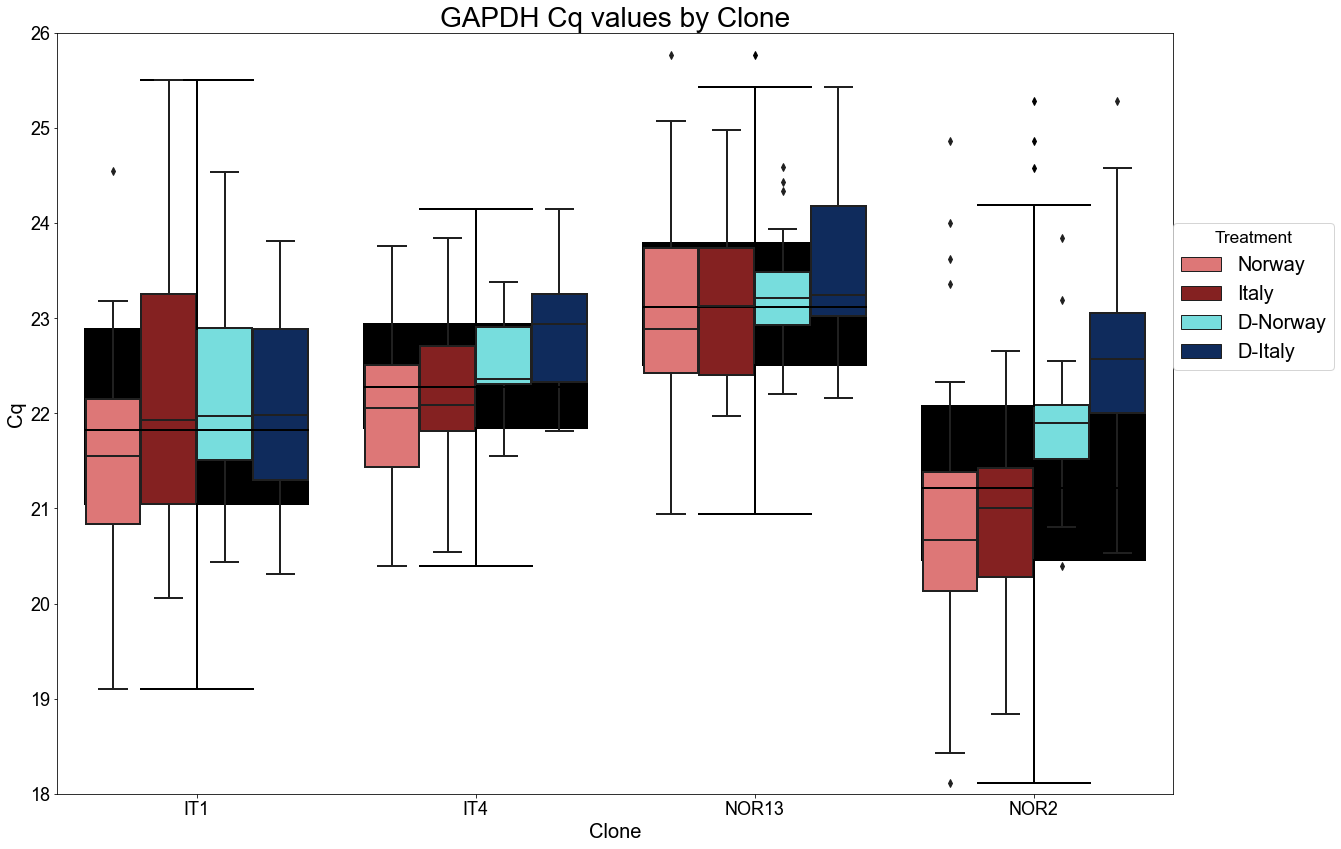

In [84]:
fig = pp.figure(figsize=(20,14))

ax1 = sb.boxplot(x='Clone', y='Cq', color='black', data = GAPDH)
ax2 = sb.boxplot(x='Clone', y='Cq', hue='treatment', data = GAPDH)

pp.ylim(18, 26)
ax2.legend(bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=0., title = 'Treatment')

pp.title('GAPDH Cq values by Clone', fontsize = '28')
pp.savefig('Circadian_gene_results_figures/GAPDH_avg_Cq.jpg', dpi = 300)
pp.show()

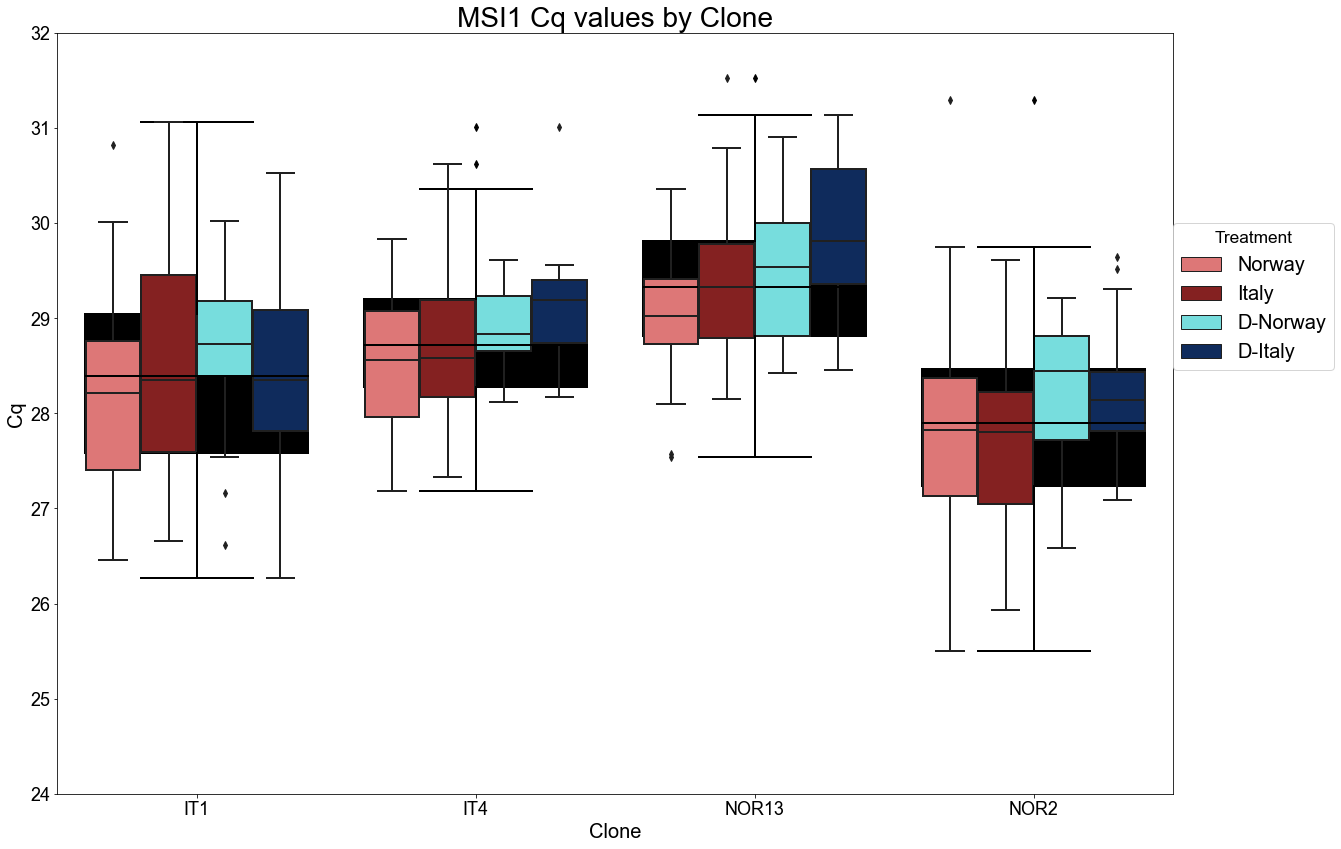

In [85]:
fig = pp.figure(figsize=(20,14))

ax1 = sb.boxplot(x='Clone', y='Cq', color='black', data = MSI1)

ax2 = sb.boxplot(x='Clone', y='Cq', hue='treatment', data = MSI1)

pp.ylim(24,32)
ax2.legend(bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=0., title = 'Treatment')

pp.title('MSI1 Cq values by Clone', fontsize = '28')
pp.savefig('Circadian_gene_results_figures/MSI1_avg_Cq.jpg', dpi = 300)
pp.show()

## Reference gene statistics

### GAPDH

In [86]:
GAPDH_formula = 'Cq ~ C(treatment) + C(Clone) + C(treatment)*C(Clone)'
GAPDH_model = ols(GAPDH_formula, GAPDH).fit()
GAPDH_anova_table = sm.stats.anova_lm(GAPDH_model, typ=2)
GAPDH_anova_table

,sum_sq,df,F,PR(>F)
C(treatment),39.710695,3.0,12.255864,1.101411e-07
C(Clone),197.704865,3.0,61.017414,1.843929e-32
C(treatment):C(Clone),28.423058,9.0,2.924058,2.283622e-03
Residual,428.778311,397.0,NaN,NaN


In [87]:
# Assumption Check - Normality 
GAPDH_res = GAPDH_model.resid
stats.shapiro(GAPDH_model.resid)

ShapiroResult(statistic=0.9861940145492554, pvalue=0.0005769907147623599)

<AxesSubplot:>

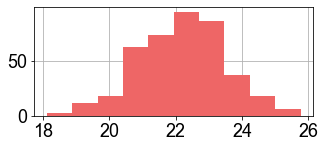

In [88]:
GAPDH['Cq'].hist(figsize=(5,2))

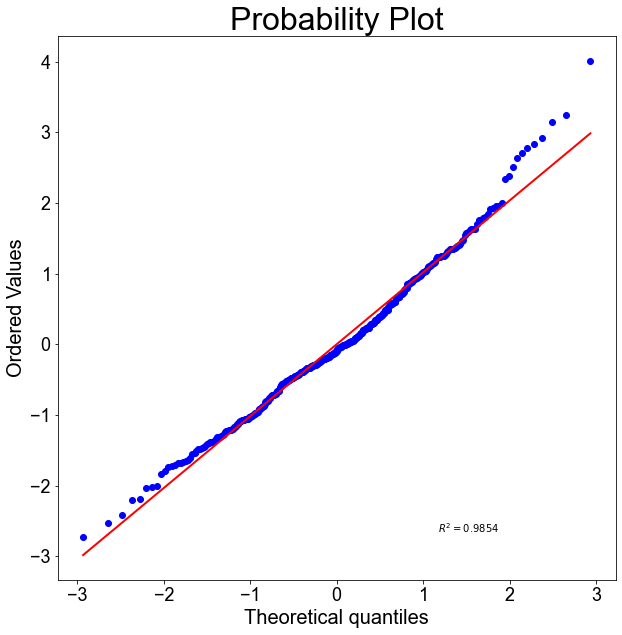

In [89]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(GAPDH_res, plot=pp,rvalue=True)
pp.show()

In [90]:
GAPDH_treatment_comp = mc.MultiComparison(GAPDH['Cq'], GAPDH['Clone'])
GAPDH_t_results = GAPDH_treatment_comp.tukeyhsd()
GAPDH_t_table = pd.DataFrame(data=GAPDH_t_results._results_table.data[1:], columns=GAPDH_t_results._results_table.data[0])
GAPDH_t_sig = GAPDH_t_table.loc[GAPDH_t_table['p-adj'] < 0.05, :]
GAPDH_t_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
1,IT1,NOR13,1.2142,0.0,0.8170,1.6114,True
2,IT1,NOR2,-0.7012,0.0,-1.0928,-0.3096,True
3,IT4,NOR13,0.9326,0.0,0.5325,1.3328,True
4,IT4,NOR2,-0.9828,0.0,-1.3774,-0.5882,True
5,NOR13,NOR2,-1.9155,0.0,-2.3080,-1.5229,True


In [91]:
GAPDH_groups = GAPDH.Clone.astype(str) + '_' + GAPDH.treatment.astype(str)

GAPDH_comp = mc.MultiComparison(GAPDH['Cq'], GAPDH_groups)
GAPDH_results = GAPDH_comp.tukeyhsd()
GAPDH_table = pd.DataFrame(data=GAPDH_results._results_table.data[1:], columns=GAPDH_results._results_table.data[0])
GAPDH_sig = GAPDH_table.loc[GAPDH_table['p-adj'] < 0.05, :]
GAPDH_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
7,IT1_D-Italy,NOR13_D-Italy,1.3670,0.0168,0.1188,2.6153,True
13,IT1_D-Italy,NOR2_Italy,-1.2531,0.0062,-2.3212,-0.1851,True
14,IT1_D-Italy,NOR2_Norway,-1.2581,0.0071,-2.3396,-0.1766,True
21,IT1_D-Norway,NOR13_D-Italy,1.3104,0.0238,0.0812,2.5396,True
27,IT1_D-Norway,NOR2_Italy,-1.3097,0.0021,-2.3554,-0.2641,True
28,IT1_D-Norway,NOR2_Norway,-1.3147,0.0025,-2.3741,-0.2553,True
34,IT1_Italy,NOR13_D-Italy,1.2113,0.0099,0.1468,2.2758,True
37,IT1_Italy,NOR13_Norway,0.8719,0.0414,0.0149,1.7289,True
40,IT1_Italy,NOR2_Italy,-1.4089,0.0000,-2.2549,-0.5629,True
41,IT1_Italy,NOR2_Norway,-1.4138,0.0000,-2.2768,-0.5509,True


Significant differences within N2 (Italy - D-Italy and Norway - D-Italy)

### MSI1

In [92]:
MSI1_formula = 'Cq ~ C(treatment) + C(Clone) + C(treatment)*C(Clone)'
MSI1_model = ols(MSI1_formula, MSI1).fit()
MSI1_anova_table = sm.stats.anova_lm(MSI1_model, typ=2)
MSI1_anova_table

,sum_sq,df,F,PR(>F)
C(treatment),15.210326,3.0,6.299082,3.494101e-04
C(Clone),121.824509,3.0,50.451425,1.207006e-27
C(treatment):C(Clone),6.668586,9.0,0.920558,5.070086e-01
Residual,319.543866,397.0,NaN,NaN


In [93]:
# Assumption Check - Normality 
MSI1_res = MSI1_model.resid
stats.shapiro(MSI1_model.resid)

ShapiroResult(statistic=0.9911720156669617, pvalue=0.014466281980276108)

<AxesSubplot:>

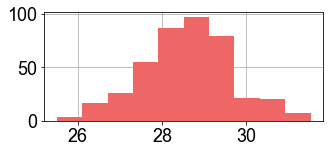

In [94]:
MSI1['Cq'].hist(figsize=(5,2))

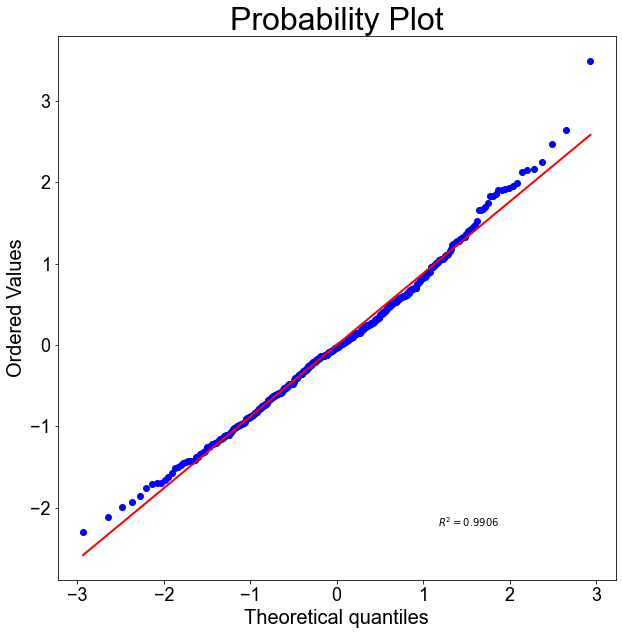

In [95]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(MSI1_res, plot=pp,rvalue=True)
pp.show()

In [96]:
MSI1_treatment_comp = mc.MultiComparison(MSI1['Cq'], MSI1['Clone'])
MSI1_t_results = MSI1_treatment_comp.tukeyhsd()
MSI1_t_table = pd.DataFrame(data=MSI1_t_results._results_table.data[1:], columns=MSI1_t_results._results_table.data[0])
MSI1_t_sig = MSI1_t_table.loc[MSI1_t_table['p-adj'] < 0.05, :]
MSI1_t_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
0,IT1,IT4,0.3369,0.0441,0.0061,0.6678,True
1,IT1,NOR13,0.9647,0.0000,0.6354,1.2939,True
2,IT1,NOR2,-0.5184,0.0003,-0.8430,-0.1938,True
3,IT4,NOR13,0.6277,0.0000,0.2960,0.9594,True
4,IT4,NOR2,-0.8554,0.0000,-1.1824,-0.5283,True
5,NOR13,NOR2,-1.4831,0.0000,-1.8085,-1.1577,True


In [97]:
MSI1_groups = MSI1.Clone.astype(str) + ' ' + MSI1.treatment.astype(str)

MSI1_comp = mc.MultiComparison(MSI1['Cq'], MSI1_groups)
MSI1_results = MSI1_comp.tukeyhsd()
MSI1_table = pd.DataFrame(data=MSI1_results._results_table.data[1:], columns=MSI1_results._results_table.data[0])
MSI1_sig = MSI1_table.loc[MSI1_table['p-adj'] < 0.05, :]
MSI1_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
7,IT1 D-Italy,NOR13 D-Italy,1.5032,0.0002,0.4256,2.5808,True
8,IT1 D-Italy,NOR13 D-Norway,1.1582,0.0215,0.0806,2.2358,True
9,IT1 D-Italy,NOR13 Italy,1.0131,0.0229,0.0659,1.9604,True
21,IT1 D-Norway,NOR13 D-Italy,1.2768,0.0042,0.2157,2.3380,True
27,IT1 D-Norway,NOR2 Italy,-0.9175,0.0419,-1.8202,-0.0148,True
34,IT1 Italy,NOR13 D-Italy,1.2961,0.0002,0.3771,2.2150,True
35,IT1 Italy,NOR13 D-Norway,0.9510,0.0341,0.0321,1.8700,True
36,IT1 Italy,NOR13 Italy,0.8059,0.0263,0.0440,1.5679,True
40,IT1 Italy,NOR2 Italy,-0.8983,0.0029,-1.6286,-0.1680,True
41,IT1 Italy,NOR2 Norway,-0.7878,0.0263,-1.5328,-0.0429,True


No significant differences within clones. 

In [98]:
data2 = data_update.copy()
data2.set_index(["Sample", 'Replicate'], drop=True, inplace = True)
data2

Target         Cq treatment zeitgeber Clone Clone_origin
Sample Replicate                                                         
I1_1A  1            LHY  21.915832    Norway         0   IT1            I
       1          GAPDH  21.834811    Norway         0   IT1            I
       1           PRR9  32.813400    Norway         0   IT1            I
       1           PRDX  22.368548    Norway         0   IT1            I
       1           MSI1  27.725956    Norway         0   IT1            I
...                 ...        ...       ...       ...   ...          ...
N2_13D 3           MSI1  28.323940   D-Italy       048  NOR2            N
       3           PRR7  25.474186   D-Italy       048  NOR2            N
       3           PRR5  26.425477   D-Italy       048  NOR2            N
       3           RVE8  25.277144   D-Italy       048  NOR2            N
       3           TOC1  27.535871   D-Italy       048  NOR2            N

[4103 rows x 6 columns]

# Transforming final datafrmae

## Calculate ΔCq & 2 <sup>-ΔCq <a class="anchor" id="delta_Cq"></a>

<AxesSubplot:>

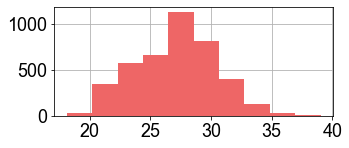

In [99]:
data2['Cq'].hist(figsize=(5,2))

<AxesSubplot:xlabel='Clone', ylabel='Cq'>

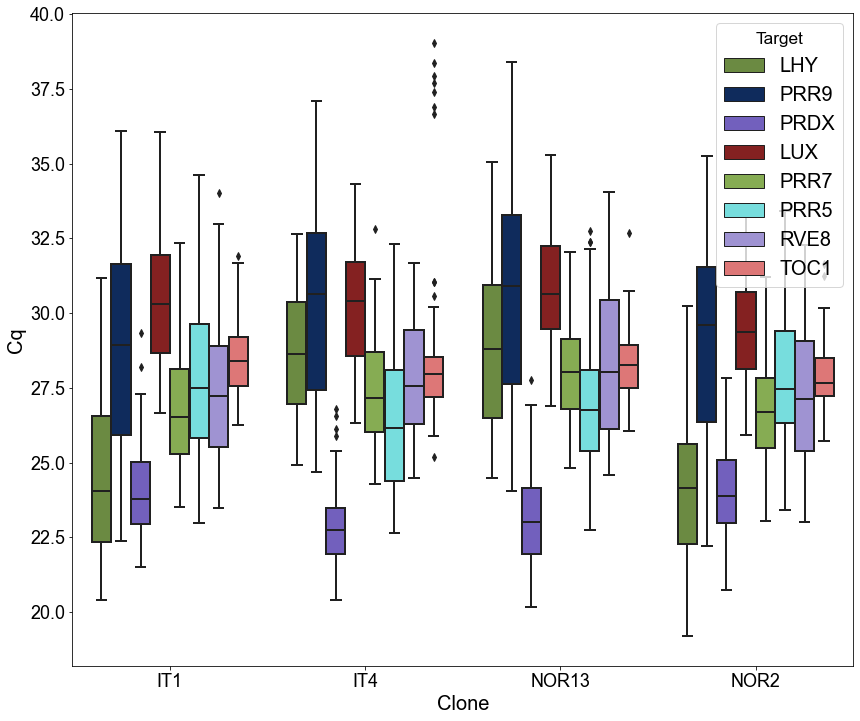

In [141]:
sb.boxplot(data=data2, x='Clone', y='Cq', hue ='Target')

Calculate delta Cq from geometric mean of two reference genes: MSI1 and GAPDH

## ΔCq 

#### Target gene (Cq) - Reference gene (geometric mean of Cq)

In [100]:
def apply_delta_Cq_geom(df, ref1, ref2):
    
    '''Determines delta Cq of each sample based on reference gene geometric mean 
    
    df: Dataframe with index: sample, columns: Target, Cq
    
    ref: reference gene to use for calculation. Must be a string
    
    '''
    ref_gene = df[(df['Target']==ref1) | (df['Target']==ref2)]

    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate', 'Target'], inplace = True)
    ref_gene = ref_gene.unstack(level=2)

    # Get geometric mean of reference genes
    ref_gene[(       'Cq', 'gmean')] = gmean([ref_gene[(       'Cq', ref1)], 
                                                            ref_gene[(       'Cq',  ref2)]])
    ref_gene = ref_gene.stack(level=1)
    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate'], inplace = True)
    
    # Subtract geometric mean from target Cq values
    df.sort_index(inplace=True)
    d2 = (df.Cq - ref_gene.loc[ref_gene['Target']=='gmean']['Cq'])
    df['delta_Cq'] = d2.values

    return df

In [101]:
apply_delta_Cq_geom(data2, 'GAPDH', 'MSI1')

Target         Cq treatment zeitgeber Clone Clone_origin  \
Sample Replicate                                                            
I1_10A 1            LHY  24.282946    Norway       036   IT1            I   
       1          GAPDH  21.278777    Norway       036   IT1            I   
       1           PRR9  24.430283    Norway       036   IT1            I   
       1           PRDX  22.831522    Norway       036   IT1            I   
       1           MSI1  26.854128    Norway       036   IT1            I   
...                 ...        ...       ...       ...   ...          ...   
N2_9D  3           MSI1  28.106467   D-Italy        32  NOR2            N   
       3           PRR7  27.157224   D-Italy        32  NOR2            N   
       3           PRR5  27.408761   D-Italy        32  NOR2            N   
       3           RVE8  24.546936   D-Italy        32  NOR2            N   
       3           TOC1  28.409097   D-Italy        32  NOR2            N   

                  delta_Cq  
Sample Replicate            
I1_10A 1          0.378490  
       1         -2.625678  
       1          0.525827  
       1         -1.072934  
       1          2.949672  
...                    ...  
N2_9D  3          3.788659  
       3          2.839416  
       3          3.090953  
       3          0.229128  
       3          4.091289  

[4103 rows x 7 columns]

## 2<sup/>-ΔCq 

In [102]:
data2['2delta_Cq'] = data2['delta_Cq'].apply(lambda x: 2 ** -(x))

#### Set zeitgeber as index, 0-48

In [103]:
data2.reset_index(inplace=True)
data2.zeitgeber = pd.to_numeric(data2.zeitgeber)
data2.sort_values(["zeitgeber", 'Sample', 'Replicate'], inplace = True)
data2.set_index('zeitgeber', inplace=True)

### Save new dataframe to excel

In [104]:
data2.to_excel('qPCR_data_final.xlsx')

# Analyze target data <a class="anchor" id="target_genes"></a>

Drop Reference genes

In [105]:
data2 = data2[data2.Target != 'GAPDH']
data2 = data2[data2.Target != 'MSI1']

Check that replicates have similar values

In [106]:
rp.summary_cont(data2.groupby("Replicate")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1116,27.6011,3.1198,0.0934,27.4179,27.7844
2,1073,27.4985,3.1009,0.0947,27.3127,27.6842
3,1088,27.6066,3.0968,0.0939,27.4224,27.7909


In [107]:
rp.summary_cont(data2.groupby("Replicate")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1116,1.1257,2.6774,0.0801,0.9684,1.2829
2,1073,1.4507,4.0066,0.1223,1.2107,1.6907
3,1088,0.8951,1.9118,0.0580,0.7814,1.0088


In [108]:
Target_groups = rp.summary_cont(data2.groupby(['Target', 'Clone']))
Target_groups

C:\Users\cfa024\Anaconda3\lib\site-packages\researchpy\summary.py:176: FutureWarning: ['Sample', 'Replicate', 'treatment', 'Clone_origin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = group1.agg(['count', numpy.mean, numpy.std,


Cq                                             delta_Cq  \
                N     Mean      SD      SE 95% Conf. Interval        N   
Target Clone                                                             
LHY    IT1    103  24.4000  2.5816  0.2544   23.8954  24.9045      103   
       IT4     99  28.5913  2.0995  0.2110   28.1725  29.0100       99   
       NOR13  102  28.9779  2.6597  0.2633   28.4555  29.5004      102   
       NOR2   108  24.1685  2.3705  0.2281   23.7163  24.6207      108   
LUX    IT1    102  30.3293  2.0018  0.1982   29.9362  30.7225      102   
       IT4     99  30.2282  1.9010  0.1911   29.8491  30.6074       99   
       NOR13  102  30.8521  1.9552  0.1936   30.4680  31.2361      102   
       NOR2   107  29.4703  1.7007  0.1644   29.1443  29.7963      107   
PRDX   IT1    100  24.0162  1.4322  0.1432   23.7321  24.3004      100   
       IT4     98  22.8551  1.2950  0.1308   22.5954  23.1147       98   
       NOR13  102  23.2378  1.6166  0.1601   22.9203  23.5553      102   
       NOR2   108  24.0160  1.5987  0.1538   23.7111  24.3210      108   
PRR5   IT1    102  27.8534  2.6733  0.2647   27.3283  28.3784      102   
       IT4     96  26.2944  2.1650  0.2210   25.8557  26.7330       96   
       NOR13  102  26.9749  2.3595  0.2336   26.5115  27.4384      102   
       NOR2   105  27.8651  2.3446  0.2288   27.4114  28.3189      105   
PRR7   IT1    103  26.9036  2.0394  0.2009   26.5051  27.3022      103   
       IT4    100  27.4399  1.6728  0.1673   27.1080  27.7718      100   
       NOR13  102  27.9897  1.6946  0.1678   27.6569  28.3226      102   
       NOR2   105  26.7610  1.7092  0.1668   26.4302  27.0918      105   
PRR9   IT1    102  28.8403  3.6225  0.3587   28.1288  29.5518      102   
       IT4    100  30.2854  3.1909  0.3191   29.6522  30.9185      100   
       NOR13  102  30.7252  3.4764  0.3442   30.0424  31.4081      102   
       NOR2   108  29.0663  3.4721  0.3341   28.4040  29.7287      108   
RVE8   IT1    103  27.4419  2.3993  0.2364   26.9730  27.9109      103   
       IT4    100  27.8605  1.8528  0.1853   27.4929  28.2281      100   
       NOR13  101  28.4224  2.5566  0.2544   27.9177  28.9271      101   
       NOR2   107  27.3369  2.2701  0.2195   26.9017  27.7720      107   
TOC1   IT1    102  28.5040  1.2246  0.1212   28.2635  28.7445      102   
       IT4     99  28.5192  2.7656  0.2780   27.9676  29.0708       99   
       NOR13  102  28.2577  1.0514  0.1041   28.0511  28.4642      102   
       NOR2   106  27.8870  1.1151  0.1083   27.6722  28.1017      106   

                                                        2delta_Cq           \
                Mean      SD      SE 95% Conf. Interval         N     Mean   
Target Clone                                                                 
LHY    IT1   -0.5977  2.3263  0.2292   -1.0524  -0.1431       103   4.1541   
       IT4    3.2884  2.1741  0.2185    2.8547   3.7220        99   0.2512   
       NOR13  2.8650  2.4167  0.2393    2.3903   3.3397       102   0.3975   
       NOR2  -0.1974  2.0466  0.1969   -0.5878   0.1930       108   2.7084   
LUX    IT1    5.3193  1.8595  0.1841    4.9541   5.6846       102   0.0480   
       IT4    4.9281  1.7289  0.1738    4.5833   5.2729        99   0.0609   
       NOR13  4.7391  1.9594  0.1940    4.3542   5.1240       102   0.0781   
       NOR2   5.0957  1.8633  0.1801    4.7386   5.4528       107   0.0569   
PRDX   IT1   -0.9656  0.9399  0.0940   -1.1521  -0.7791       100   2.3235   
       IT4   -2.4653  1.2169  0.1229   -2.7093  -2.2213        98   7.4607   
       NOR13 -2.8751  1.3463  0.1333   -3.1396  -2.6107       102  10.2611   
       NOR2  -0.3498  1.0489  0.1009   -0.5499  -0.1498       108   1.6235   
PRR5   IT1    2.8732  2.2549  0.2233    2.4303   3.3161       102   0.3153   
       IT4    1.0219  2.0147  0.2056    0.6137   1.4301        96   1.0362   
       NOR13  0.8619  2.3054  0.2283    0.4091   1.3148       102   1.2644   
       NOR2   3.5147

<AxesSubplot:xlabel='Clone', ylabel='Cq'>

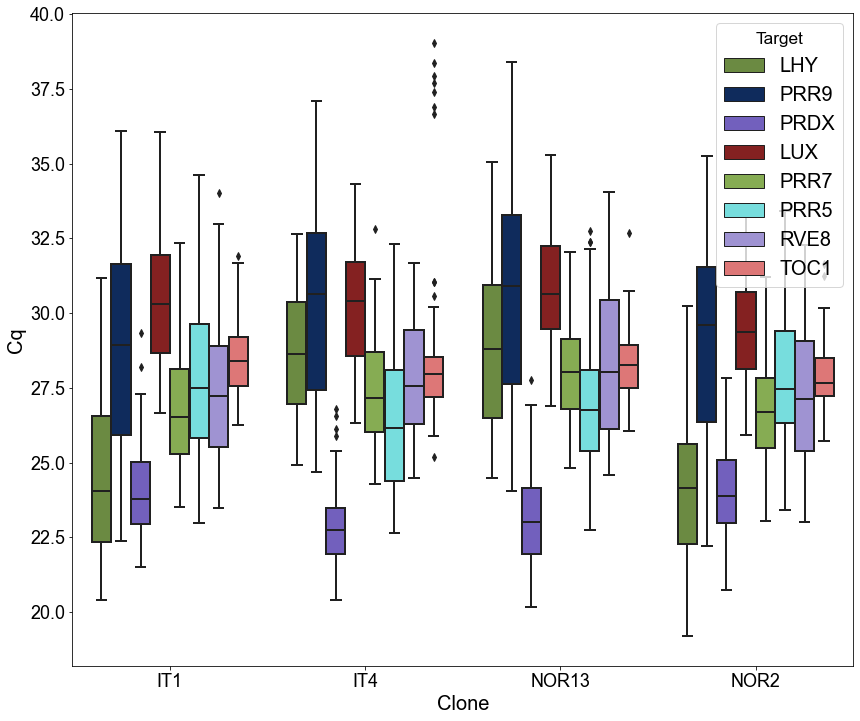

In [142]:
sb.boxplot(data=data2, x='Clone', y='Cq', hue ='Target')

<AxesSubplot:xlabel='Target', ylabel='Cq'>

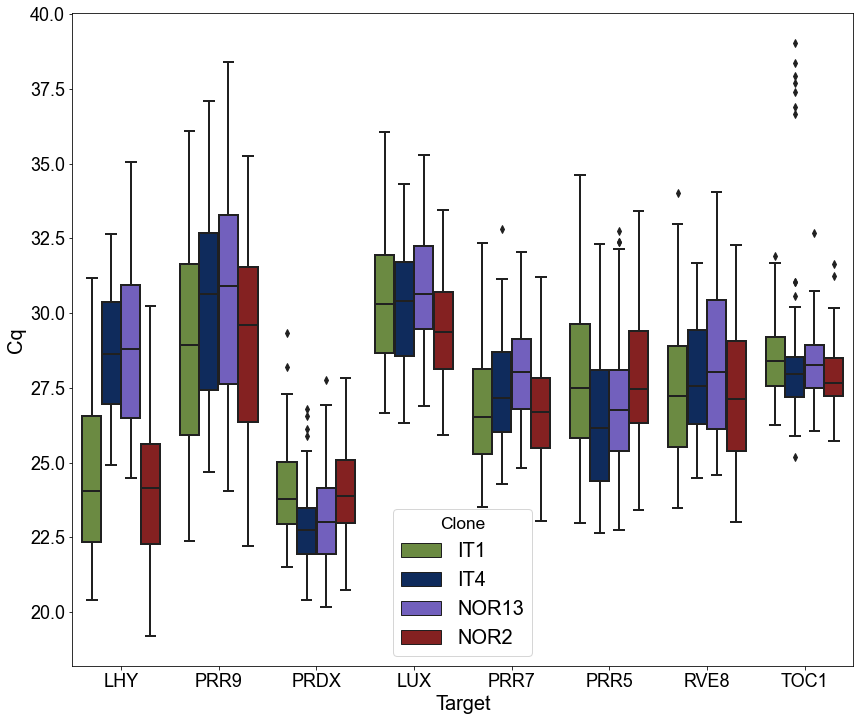

In [143]:
sb.boxplot(data=data2, x='Target', y='Cq', hue ='Clone')

<AxesSubplot:xlabel='Target', ylabel='2delta_Cq'>

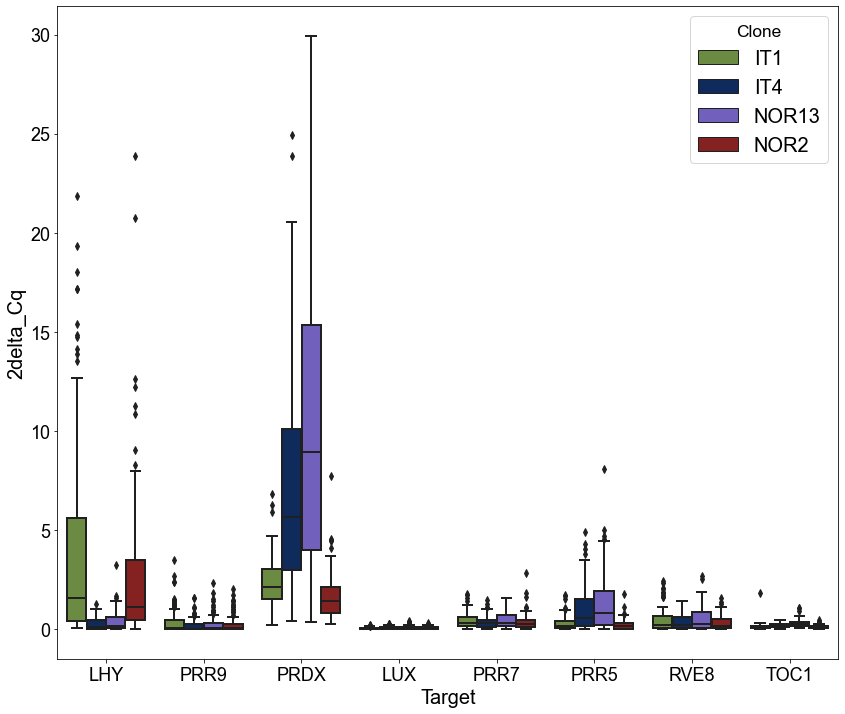

In [144]:
sb.boxplot(data=data2, x='Target', y='2delta_Cq', hue ='Clone')

In [111]:
rp.summary_cont(data2.groupby("Target")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,412,26.4798,3.3192,0.1635,26.1584,26.8013
LUX,410,30.2108,1.9490,0.0963,30.0216,30.4000
PRDX,408,23.5427,1.5719,0.0778,23.3897,23.6956
PRR5,405,27.2656,2.4742,0.1229,27.0239,27.5073
PRR7,410,27.2681,1.8447,0.0911,27.0890,27.4472
PRR9,412,29.7170,3.5240,0.1736,29.3757,30.0582
RVE8,411,27.7574,2.3174,0.1143,27.5327,27.9821
TOC1,409,28.2863,1.6937,0.0837,28.1217,28.4510


In [112]:
rp.summary_cont(data2.groupby("Target")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,412,1.9073,3.6942,0.1820,1.5495,2.2651
LUX,410,0.0609,0.0686,0.0034,0.0542,0.0676
PRDX,408,5.3565,5.8354,0.2889,4.7886,5.9244
PRR5,405,0.7005,1.0175,0.0506,0.6011,0.7999
PRR7,410,0.3962,0.3753,0.0185,0.3598,0.4327
PRR9,412,0.2610,0.4665,0.0230,0.2158,0.3062
RVE8,411,0.4014,0.4828,0.0238,0.3546,0.4482
TOC1,409,0.1757,0.1635,0.0081,0.1598,0.1916


In [114]:
display(rp.summary_cont(data2.groupby("Clone")['Cq']))

,N,Mean,SD,SE,95% Conf.,Interval
Clone,,,,,,
IT1,817,27.2903,3.0952,0.1083,27.0777,27.5028
IT4,791,27.7739,3.1240,0.1111,27.5559,27.9919
NOR13,815,28.1794,3.1944,0.1119,27.9598,28.3991
NOR2,854,27.0647,2.8935,0.0990,26.8703,27.2590


In [115]:
data2.reset_index(inplace = True)

In [116]:
data2.head()

,zeitgeber,Sample,Replicate,Target,Cq,treatment,Clone,Clone_origin,delta_Cq,2delta_Cq
0,0,I1_1A,1,LHY,21.915832,Norway,IT1,I,-2.688863,6.448049
1,0,I1_1A,1,PRR9,32.813400,Norway,IT1,I,8.208705,0.003380
2,0,I1_1A,1,PRDX,22.368548,Norway,IT1,I,-2.236147,4.711370
3,0,I1_1A,1,LUX,30.779054,Norway,IT1,I,6.174359,0.013846
4,0,I1_1A,1,PRR7,28.753618,Norway,IT1,I,4.148923,0.056370


## Plot function

In [117]:
def plot_gene(df, target_gene):
    
    
    '''Plot data for specified target gene by individual clone

    Groups data by two treatments (Italy and Norway) including respective dark treatments.
    
    :param df: DataFrame
    :param target_gene: gene name to pull from targets
    :return: 2 figures for gene and treatments
    '''  
    colors = cycler('color',
                ['#6d9636', # dark green
                 '#022869', # dark blue
                 '#6950cd', # dark purple
                 '#941111', # dark red
                 '#88BB44', # green    
                 '#66EEEE', # bright blue    
                 '#9988DD', # purple   
                 '#EE6666']) # bright red
    params = {'axes.prop_cycle': colors}
    mpl.rcParams.update(params)
    
    
    # Set figure to have 2 subplots
    fig, (ax1, ax2) = pp.subplots(2, 1, figsize = (16,14)) 
    
    #Pull data for specified target gene from dataframe
    gene_data = df.loc[df['Target']==target_gene] 
    
    #Set label for treatment names for legend
    legend_dict = {'Italy': ' ', 'Norway': ' ', 'D-Italy': '-D', 'D-Norway' : '-D'}
    
    # Plot Italy on ax1, Norway on ax2
    It = gene_data[gene_data['treatment'].str.contains('Italy')] 
    It_groups = It.groupby('treatment')

    for name, group in It_groups: # name = treatment group = data for treatment
        
        It_result = group.groupby(['zeitgeber', 'Clone']).agg({'2delta_Cq' : ['mean', 'std']}) #groupby sample within treatment
        It_x = It_result.index.levels[0] # Zeitgebers for x-axis
        It_clones = It_result.index.levels[1] # Clones for separate y-values

        for clone in It_clones:
            
            # Pulls mean 2^-Cq for each clone & zeitgeber (y-values)
            It_avg_data = It_result.loc[[(zeitgeber, clone) for zeitgeber in It_x], ('2delta_Cq', 'mean')] 
            # Pulls std of mean 2^-Cq for each clone & zeitgeber 
            It_err_data = It_result.loc[[(zeitgeber, clone) for zeitgeber in It_x], ('2delta_Cq',  'std')] 
            
            # Set label names to legend items for legend 
            label1 = ""
            if name in legend_dict.keys():
                label1 = str(legend_dict[name])
            else: label1= ' '
            
            ## PLOT 
            It_plot = ax1.errorbar(It_x, It_avg_data, yerr = It_err_data, fmt = '-o',
                                   label = str(clone) + str(label1))
            ax1.set_xticks(It_x)
            ax1.set_title('Italy', x=0.05, y=0.9, fontsize = '20')
            ax1.set_ylim(0, gene_data['2delta_Cq'].max())
            ax1.set_ylabel("Relative Expression")   

            
    # Plotting Norway ax2
    No = gene_data[gene_data['treatment'].str.contains('Norway')] 
    No_groups = No.groupby('treatment')
    
    for name, group in No_groups:
        Norway_result = group.groupby(['zeitgeber', 'Clone']).agg({'2delta_Cq' : ['mean', 'std']})
        No_x = Norway_result.index.levels[0]
        No_clones = Norway_result.index.levels[1]

        for clone in No_clones:
            No_avg_data = Norway_result.loc[[(zeitgeber, clone) for zeitgeber in No_x], ('2delta_Cq', 'mean')] 
            No_err_data = Norway_result.loc[[(zeitgeber, clone) for zeitgeber in No_x], ('2delta_Cq',  'std')] 
            
            label2 = ""
            if name in legend_dict.keys():
                label2 = str(legend_dict[name])
            else: label2= ' '
              
            ## PLOT
            No_plot = ax2.errorbar(No_x, No_avg_data, No_err_data, fmt = '-o',
                                  label = str(clone) + str(label2))
            ax2.set_xticks(No_x)
            ax2.set_title('Norway', x=0.05, y=0.9, fontsize = '20')
            ax2.set_xlabel("Zeitgeber")
            ax2.set_ylim(0, gene_data['2delta_Cq'].max())
            ax2.set_ylabel("Relative Expression")
            
    ## LEGEND
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], 
               borderaxespad=0., bbox_to_anchor=(1.05, 0.25), 
               title='Clone', loc = 2)    
 
    fig.suptitle(t = target_gene, fontsize = '36')
    pp.subplots_adjust(hspace=.0)
    pp.savefig("Circadian_gene_results_figures/" + target_gene + "_expression.png", dpi=300, bbox_inches='tight')
    return fig, (ax1, ax2)

In [118]:
def peak_values(df, target_gene):
    
    gene_data = df[df['Target']== target_gene]
    
    g = gene_data.groupby(['treatment', 'Clone', 'zeitgeber'])['2delta_Cq'].mean()
    g = pd.DataFrame(data = g)
    g.reset_index(inplace=True)
    g.set_index('zeitgeber', inplace = True)
    
    r = g.groupby(['treatment', 'Clone']).agg({'2delta_Cq': ['idxmin', 'min', 'idxmax', 'max']})
    r.sort_values(by=['treatment'], ascending = False, inplace = True)

    r.to_excel("Circadian_gene_results_statistics/Min_max_ZT_" + target_gene + ".xlsx")
    return(r)

# ANOVA & Tukey HSD significance functions

In [119]:
def clone_anova(df, target_gene):
    
    formula = 'Q("2delta_Cq")' + '~C(zeitgeber, Sum) + C(treatment, Sum) + C(Clone, Sum) + C(zeitgeber, Sum)*C(treatment, Sum)*C(Clone, Sum)'
    model = ols(formula, data=df[df['Target'] == target_gene]).fit()
    aov = sm.stats.anova_lm(model, typ=3)
    return(aov)

### Tukey test by treatment groups

In [120]:
def tukey_treatment_groups(df, target_gene):
    
    '''Within each treatment, at which ZT do the clones have different expression'''
    
    gene_data = df[df['Target']==target_gene]
    N_data = gene_data[gene_data['treatment'] == 'Norway']
    I_data = gene_data[gene_data['treatment'] == 'Italy']
    
            # N_data = LHY_test[LHY_test['treatment'].str.contains('Norway')]
            # I_data = LHY_test[LHY_test['treatment'].str.contains('Italy')]
    
    # Norwegian treatment        
    N_groups =  N_data.zeitgeber.astype(str)+ '_' + N_data.Clone.astype(str)

    N_comp = mc.MultiComparison(N_data['2delta_Cq'], N_groups)
    N_results = N_comp.tukeyhsd()
    N_table = pd.DataFrame(data = N_results._results_table.data[1:], columns = N_results._results_table.data[0])
    N_sig = N_table.loc[N_table['p-adj'] < 0.05, :]
    
    N_sig['zeitgeber'] = N_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    N_sig['zeitgeber_2'] = N_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    N_sig['Clone_1'] = N_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    N_sig['Clone_2'] = N_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    N_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    Grouped_ZT = N_sig.loc[(N_sig['zeitgeber'] == N_sig['zeitgeber_2'])]
    
    Grouped_ZT.drop(['zeitgeber_2'], axis = 1, inplace =True)
    
    Grouped_ZT.to_excel("Circadian_gene_results_statistics/Significant_clones_Norway_" + target_gene + ".xlsx")
   
    print('Significant results for Norwegian treatment')
    display(Grouped_ZT)
    
    
    # Italian treatment
    I_groups =   I_data.zeitgeber.astype(str) + '_' + I_data.Clone.astype(str) 

    comp = mc.MultiComparison(I_data['2delta_Cq'], I_groups)
    results = comp.tukeyhsd()
    table = pd.DataFrame(data = results._results_table.data[1:], columns = results._results_table.data[0])
    I_sig = table.loc[table['p-adj'] < 0.05, :]
    
    I_sig['zeitgeber'] = I_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    I_sig['zeitgeber_2'] = I_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    I_sig['Clone_1'] = I_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    I_sig['Clone_2'] = I_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    I_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    Grouped_ZT_I = I_sig.loc[(I_sig['zeitgeber'] == I_sig['zeitgeber_2'])]
    Grouped_ZT_I.drop(['zeitgeber_2'], axis = 1, inplace =True)
    Grouped_ZT_I.to_excel("Circadian_gene_results_statistics/Significant_clones_Italy_" + target_gene + ".xlsx")
    
    print('Significant results for Italian treatment')
    display(Grouped_ZT_I)
    

# Plot target genes 2<sup>-ΔCq <a class="anchor" id="target_plots"></a>

## LHY

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

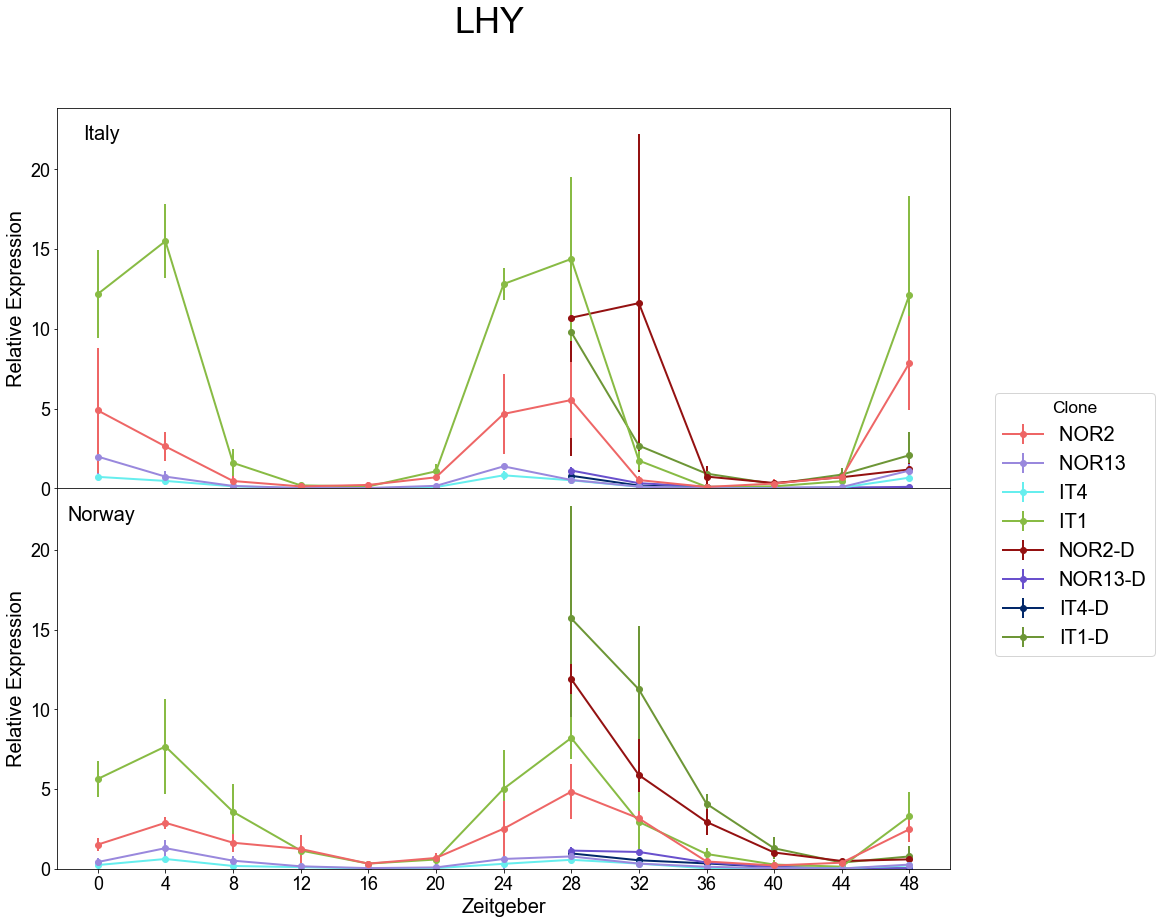

In [124]:
plot_gene(data2, 'LHY')

In [148]:
peak_values(data2, 'LHY')

2delta_Cq                            
                   idxmin       min idxmax        max
treatment Clone                                      
Norway    IT1          44  0.133459     28   8.209275
          IT4          40  0.013659      4   0.615107
          NOR13        44  0.016801      4   1.295026
          NOR2         40  0.209462     28   4.840009
Italy     IT1          36  0.092941      4  15.504568
          IT4          16  0.008882     24   0.813393
          NOR13        36  0.004678      0   1.987481
          NOR2         36  0.083358     48   7.860449
D-Norway  IT1          44  0.391827     28  15.704350
          IT4          48  0.017409     28   0.964340
          NOR13        48  0.030139     28   1.141765
          NOR2         44  0.489863     28  11.904944
D-Italy   IT1          40  0.271535     28   9.792016
          IT4          40  0.025946     28   0.785141
          NOR13        40  0.025956     28   1.114795
          NOR2         40  0.332362     32  11.615560

In [149]:
clone_anova(data2, 'LHY')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,1379.925650,1.0,410.322077,2.134265e-55
"C(zeitgeber, Sum)",1284.769322,12.0,31.835605,2.446868e-44
"C(treatment, Sum)",106.574172,3.0,10.563307,1.407475e-06
"C(Clone, Sum)",1034.064387,3.0,102.493311,8.165325e-44
"C(zeitgeber, Sum):C(treatment, Sum)",959.082102,36.0,7.921775,7.923463e-23
"C(zeitgeber, Sum):C(Clone, Sum)",1185.706236,36.0,9.793632,2.862298e-31
"C(treatment, Sum):C(Clone, Sum)",197.785465,9.0,6.534631,2.135714e-08
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",1163.933309,108.0,3.204598,2.038292e-13
Residual,874.387924,260.0,NaN,NaN


In [150]:
tukey_treatment_groups(data2, 'LHY')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
0,-5.3996,0.0000,-8.7521,-2.0472,True,0,IT1,IT4
1,-5.2116,0.0001,-8.8841,-1.5392,True,0,IT1,NOR13
2,-4.1184,0.0095,-7.7908,-0.4460,True,0,IT1,NOR2
696,-4.7086,0.0000,-7.7072,-1.7101,True,24,IT1,IT4
697,-4.4037,0.0005,-7.7561,-1.0512,True,24,IT1,NOR13
830,-7.6452,0.0000,-10.9977,-4.2928,True,28,IT1,IT4
831,-7.4339,0.0000,-10.7864,-4.0815,True,28,IT1,NOR13
832,-3.3693,0.0469,-6.7217,-0.0168,True,28,IT1,NOR2
862,4.2760,0.0001,1.2774,7.2745,True,28,IT4,NOR2
891,4.0647,0.0002,1.0662,7.0632,True,28,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
0,-11.4729,0.0000,-17.5707,-5.3751,True,0,IT1,IT4
1,-10.2009,0.0000,-16.2988,-4.1031,True,0,IT1,NOR13
2,-7.3038,0.0030,-13.4016,-1.2059,True,0,IT1,NOR2
696,-12.0002,0.0000,-18.6800,-5.3204,True,24,IT1,IT4
697,-11.4382,0.0001,-19.6193,-3.2571,True,24,IT1,NOR13
698,-8.1504,0.0003,-14.2482,-2.0525,True,24,IT1,NOR2
830,-13.8867,0.0000,-19.9845,-7.7889,True,28,IT1,IT4
831,-13.8647,0.0000,-19.9626,-7.7669,True,28,IT1,NOR13
832,-8.8498,0.0000,-14.3039,-3.3957,True,28,IT1,NOR2
1260,-11.4727,0.0000,-16.9267,-6.0186,True,48,IT1,IT4


## RVE8

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

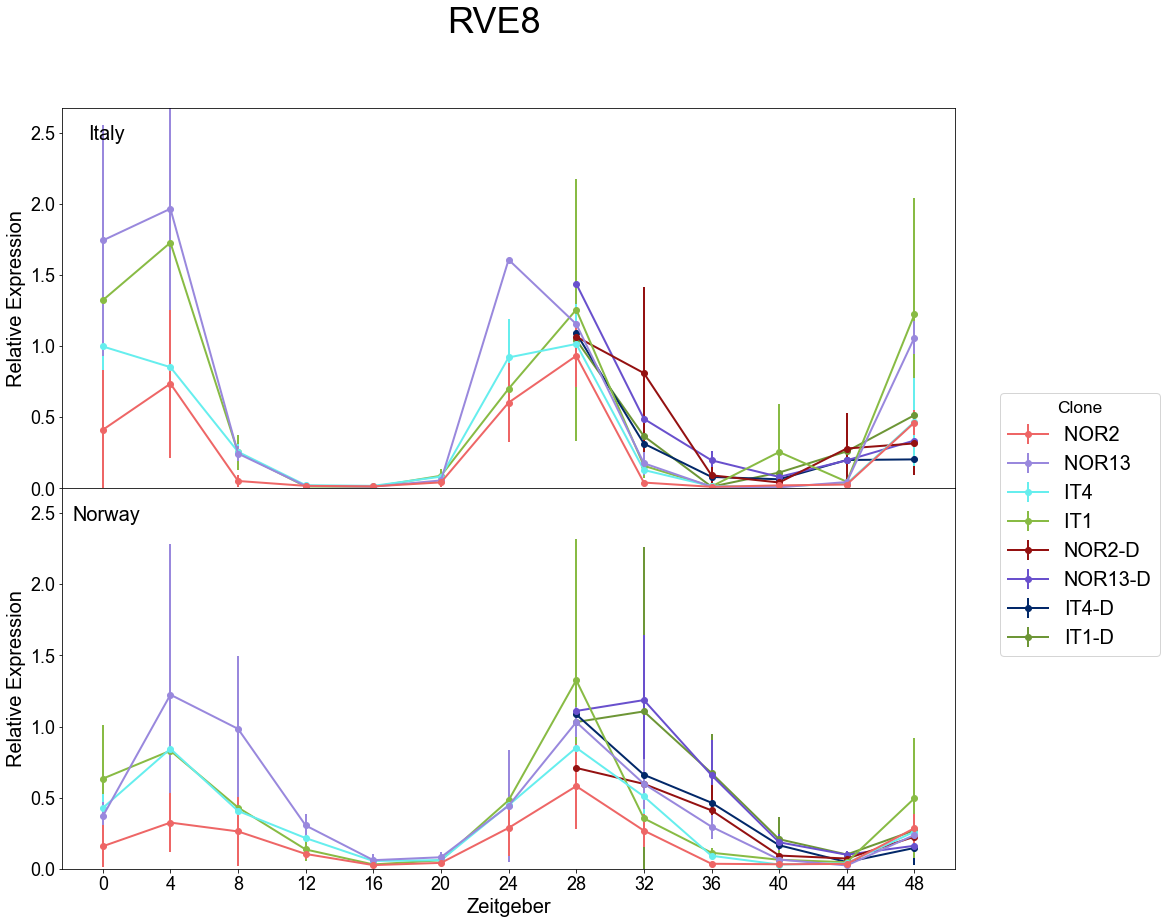

In [125]:
plot_gene(data2, 'RVE8')

In [151]:
peak_values(data2, 'RVE8')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1          16  0.030627     28  1.325654
          IT4          40  0.030028     28  0.850881
          NOR13        44  0.023578      4  1.223633
          NOR2         16  0.026027     28  0.580929
Italy     IT1          16  0.010599      4  1.726436
          IT4          40  0.013137     28  1.014228
          NOR13        40  0.006415      4  1.964451
          NOR2         36  0.010134     28  0.930905
D-Norway  IT1          44  0.100484     32  1.106045
          IT4          44  0.047246     28  1.084749
          NOR13        44  0.099003     32  1.185614
          NOR2         44  0.072131     28  0.708797
D-Italy   IT1          36  0.011133     28  1.043145
          IT4          40  0.063224     28  1.089621
          NOR13        40  0.079819     28  1.437331
          NOR2         40  0.040756     28  1.065583

In [152]:
clone_anova(data2, 'RVE8')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,61.064391,1.0,750.573264,1.758491e-78
"C(zeitgeber, Sum)",51.844196,12.0,53.103599,9.574909e-63
"C(treatment, Sum)",2.060483,3.0,8.442147,2.258526e-05
"C(Clone, Sum)",3.450012,3.0,14.135280,1.465515e-08
"C(zeitgeber, Sum):C(treatment, Sum)",40.782503,36.0,13.924398,1.124244e-38
"C(zeitgeber, Sum):C(Clone, Sum)",5.778004,36.0,1.972788,1.378468e-03
"C(treatment, Sum):C(Clone, Sum)",0.776656,9.0,1.060696,3.924206e-01
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",10.083470,108.0,1.147602,2.030035e-01
Residual,21.071464,259.0,NaN,NaN


In [153]:
tukey_treatment_groups(data2, 'RVE8')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
1311,-0.8988,0.0242,-1.7508,-0.0469,True,4,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
101,-1.3309,0.0004,-2.3387,-0.3230,True,0,NOR13,NOR2
1311,-1.2291,0.0148,-2.3559,-0.1023,True,4,NOR13,NOR2


## PRR9

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

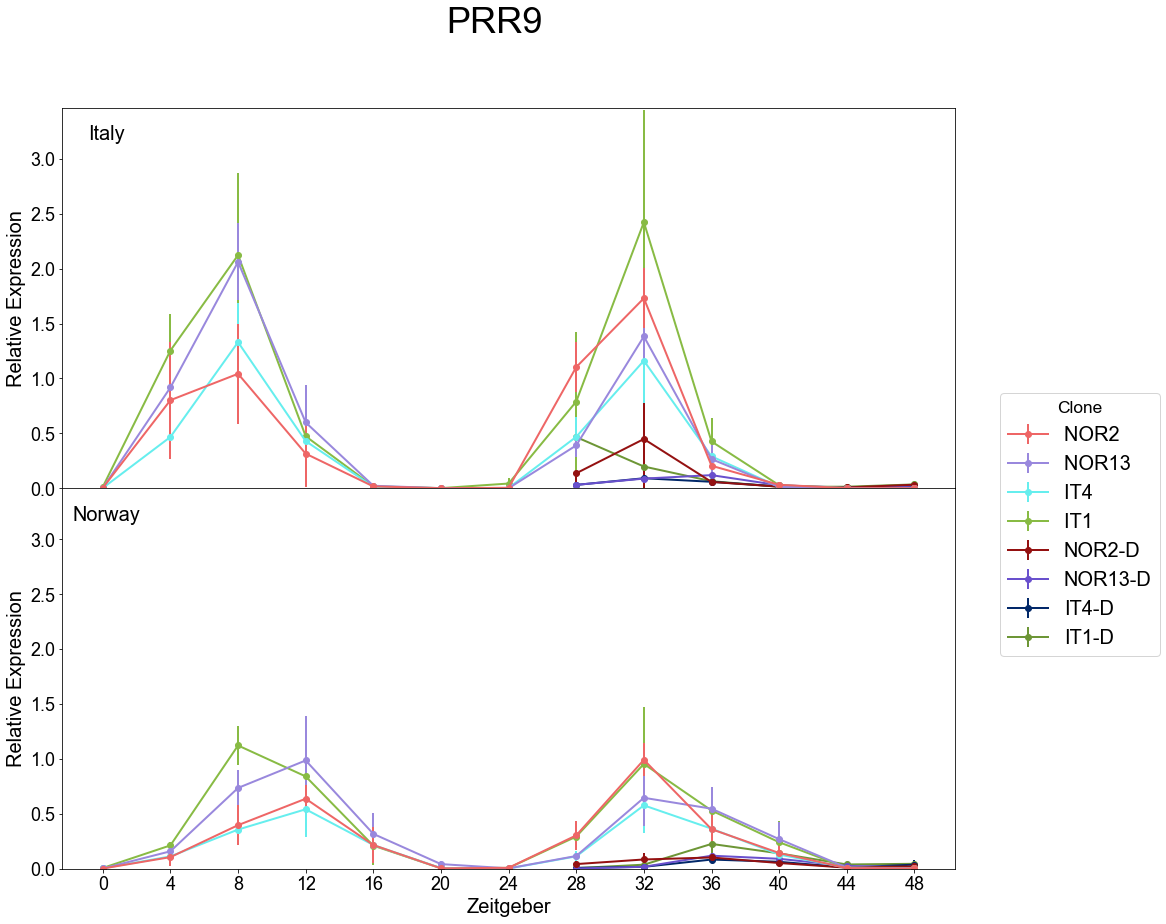

In [122]:
plot_gene(data2, 'PRR9')

In [154]:
peak_values(data2, 'PRR9')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1          20  0.004858      8  1.123197
          IT4          24  0.002569     32  0.577847
          NOR13        48  0.001712     12  0.986942
          NOR2          0  0.002668     32  0.992538
Italy     IT1          20  0.001459     32  2.423644
          IT4          20  0.000719      8  1.330964
          NOR13        24  0.000359      8  2.061689
          NOR2         48  0.000592     32  1.730906
D-Norway  IT1          28  0.006376     36  0.226615
          IT4          28  0.008294     36  0.084207
          NOR13        28  0.002696     36  0.119400
          NOR2         44  0.010356     36  0.102989
D-Italy   IT1          40  0.013572     28  0.466632
          IT4          44  0.003572     32  0.091368
          NOR13        44  0.005250     36  0.119712
          NOR2         44  0.007971     32  0.448545

In [155]:
clone_anova(data2, 'PRR9')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,13.314002,1.0,334.622630,1.296430e-48
"C(zeitgeber, Sum)",40.050348,12.0,83.882574,4.457998e-82
"C(treatment, Sum)",8.986544,3.0,75.286679,4.429126e-35
"C(Clone, Sum)",0.789601,3.0,6.615047,2.532547e-04
"C(zeitgeber, Sum):C(treatment, Sum)",54.286630,36.0,37.899814,6.653611e-78
"C(zeitgeber, Sum):C(Clone, Sum)",5.133873,36.0,3.584176,1.272349e-09
"C(treatment, Sum):C(Clone, Sum)",0.378063,9.0,1.055769,3.961819e-01
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",7.359893,108.0,1.712752,5.594202e-04
Residual,10.344908,260.0,NaN,NaN


In [156]:
tukey_treatment_groups(data2, 'PRR9')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
1320,-0.7658,0.0000,-1.2945,-0.2371,True,8,IT1,IT4
1322,-0.7257,0.0002,-1.2544,-0.1970,True,8,IT1,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
948,-1.2616,0.0003,-2.2072,-0.3160,True,32,IT1,IT4
1322,-1.0810,0.0069,-2.0266,-0.1354,True,8,IT1,NOR2


## PRR7

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\

(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

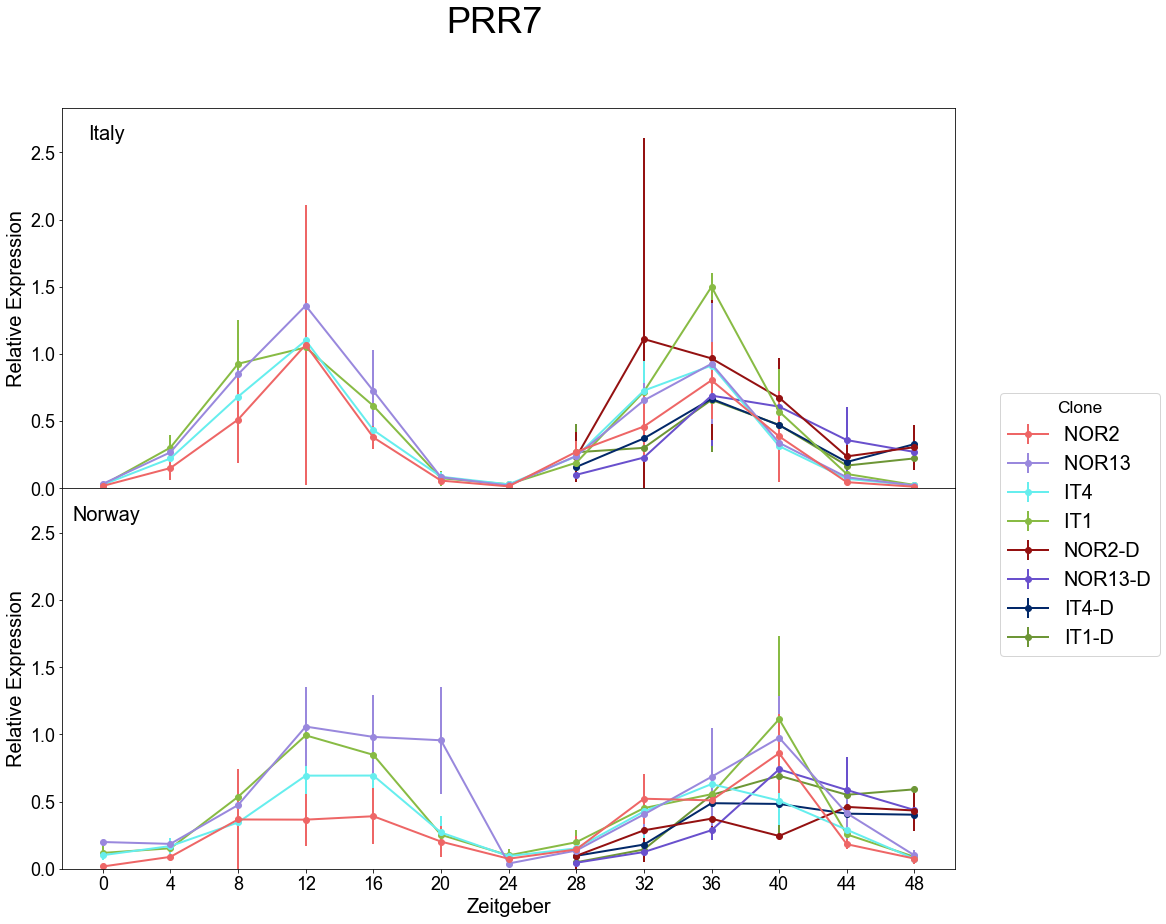

In [123]:
plot_gene(data2, 'PRR7')

In [157]:
peak_values(data2, 'PRR7')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1          48  0.088995     40  1.113748
          IT4          48  0.074496     16  0.694057
          NOR13        24  0.039357     12  1.058540
          NOR2          0  0.017190     40  0.860325
Italy     IT1           0  0.023618     36  1.499939
          IT4          48  0.021318     12  1.100328
          NOR13        48  0.020550     12  1.359624
          NOR2         48  0.011416     12  1.067999
D-Norway  IT1          28  0.048668     40  0.692642
          IT4          28  0.096570     36  0.488361
          NOR13        28  0.045061     40  0.740513
          NOR2         28  0.096465     44  0.460703
D-Italy   IT1          44  0.169148     36  0.658084
          IT4          28  0.158545     36  0.665709
          NOR13        28  0.100209     36  0.689631
          NOR2         28  0.232306     32  1.110925

In [158]:
clone_anova(data2, 'PRR7')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,43.185005,1.0,704.744458,9.746736e-76
"C(zeitgeber, Sum)",24.366906,12.0,33.137354,1.574045e-45
"C(treatment, Sum)",0.301829,3.0,1.641869,1.801382e-01
"C(Clone, Sum)",0.281324,3.0,1.530329,2.070519e-01
"C(zeitgeber, Sum):C(treatment, Sum)",27.699189,36.0,12.556345,2.389088e-35
"C(zeitgeber, Sum):C(Clone, Sum)",1.907696,36.0,0.864779,6.921567e-01
"C(treatment, Sum):C(Clone, Sum)",1.427780,9.0,2.588912,7.142451e-03
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",5.365362,108.0,0.810726,8.772233e-01
Residual,15.809605,258.0,NaN,NaN


In [159]:
tukey_treatment_groups(data2, 'PRR7')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
547,0.7035,0.0251,0.0351,1.3719,True,20,IT1,NOR13
585,0.6864,0.0353,0.0180,1.3548,True,20,IT4,NOR13
623,-0.7541,0.0086,-1.4225,-0.0857,True,20,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2


## TOC1

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

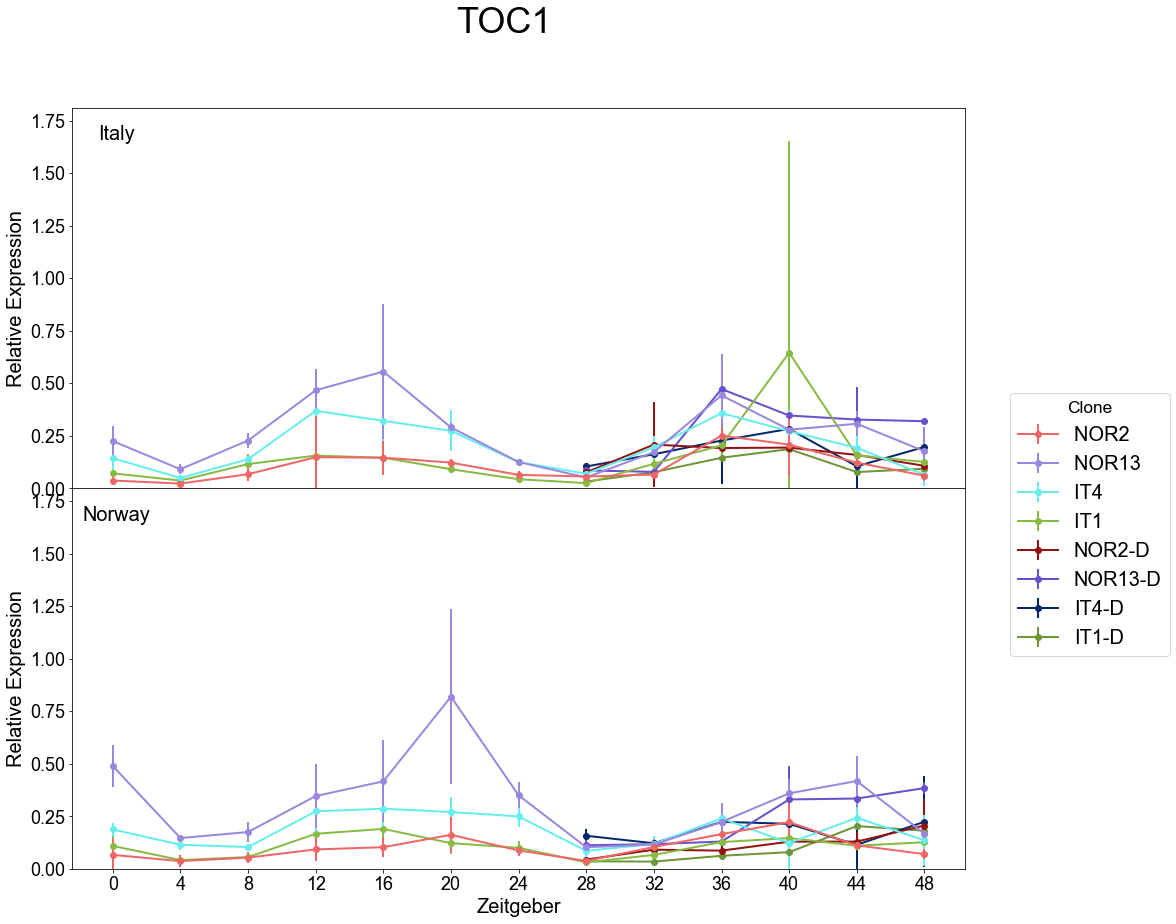

In [126]:
plot_gene(data2, 'TOC1')

In [160]:
peak_values(data2, 'TOC1')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1          28  0.030823     16  0.189871
          IT4          28  0.085182     16  0.285939
          NOR13        28  0.102731     20  0.819009
          NOR2          4  0.036552     40  0.221943
Italy     IT1          28  0.024469     40  0.645336
          IT4           4  0.049141     12  0.368470
          NOR13        28  0.051506     16  0.555653
          NOR2          4  0.022357     36  0.250901
D-Norway  IT1          32  0.034245     44  0.203311
          IT4          44  0.114169     48  0.223819
          NOR13        28  0.111995     48  0.384043
          NOR2         28  0.043878     48  0.205951
D-Italy   IT1          28  0.032066     40  0.186230
          IT4          28  0.103753     40  0.282685
          NOR13        32  0.078195     36  0.472323
          NOR2         28  0.075834     32  0.207852

In [161]:
clone_anova(data2, 'TOC1')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,8.027055,1.0,505.739457,1.191216e-62
"C(zeitgeber, Sum)",1.765127,12.0,9.267559,7.733147e-15
"C(treatment, Sum)",0.119154,3.0,2.502398,5.981045e-02
"C(Clone, Sum)",1.417020,3.0,29.759484,1.509435e-16
"C(zeitgeber, Sum):C(treatment, Sum)",2.077716,36.0,3.636255,8.806873e-09
"C(zeitgeber, Sum):C(Clone, Sum)",0.771519,36.0,1.350251,9.699033e-02
"C(treatment, Sum):C(Clone, Sum)",0.160208,9.0,1.121531,3.476973e-01
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",2.097742,108.0,1.223767,1.131315e-01
Residual,4.079083,257.0,NaN,NaN


In [162]:
tukey_treatment_groups(data2, 'TOC1')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
101,-0.4230,0.013,-0.8078,-0.0383,True,0,NOR13,NOR2
547,0.6971,0.000,0.3829,1.0112,True,20,IT1,NOR13
585,0.5489,0.000,0.2348,0.8630,True,20,IT4,NOR13
623,-0.6573,0.000,-0.9715,-0.3432,True,20,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2


## LUX

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

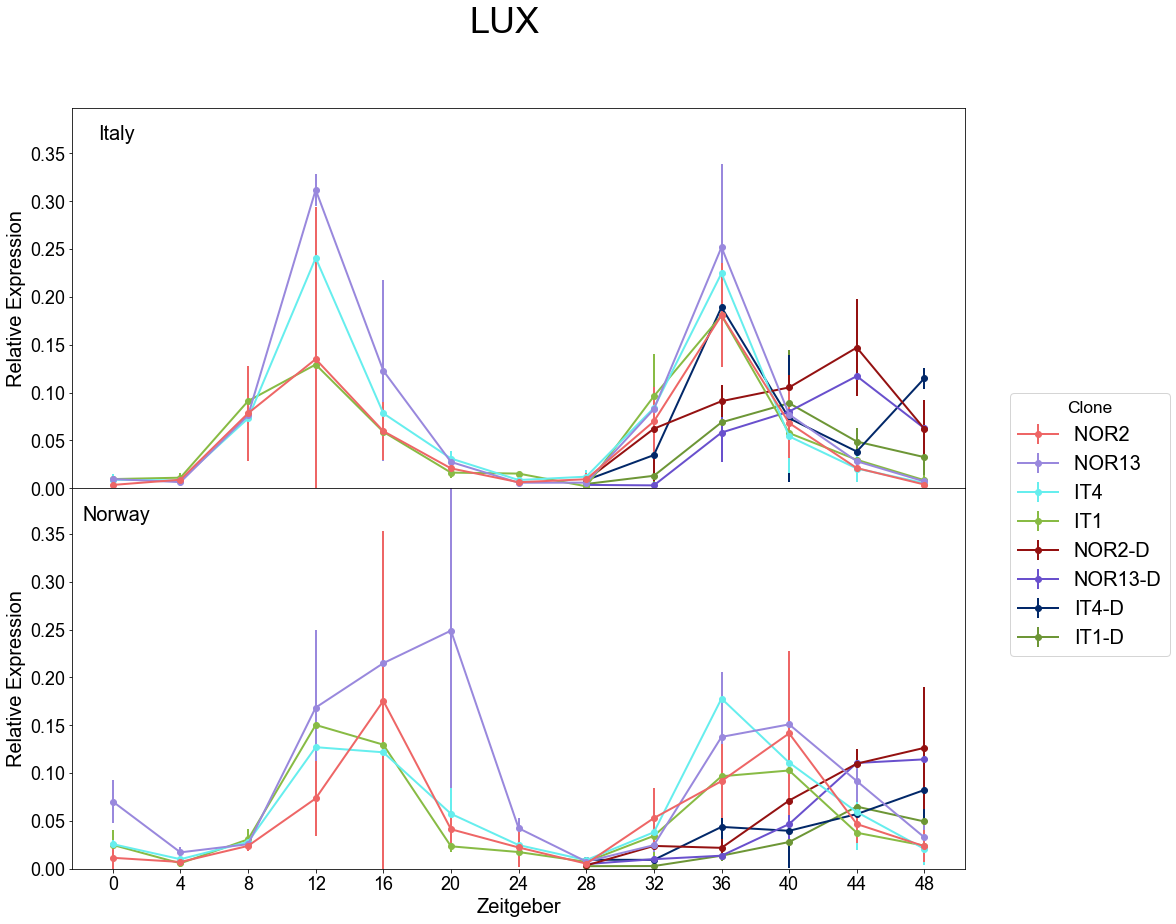

In [127]:
plot_gene(data2, 'LUX')

In [163]:
peak_values(data2, 'LUX')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1           4  0.005729     12  0.150377
          IT4          28  0.009061     36  0.177938
          NOR13        28  0.007571     20  0.248959
          NOR2         28  0.005410     16  0.175564
Italy     IT1          28  0.002057     36  0.180667
          IT4          48  0.005358     12  0.240766
          NOR13        24  0.005829     12  0.312018
          NOR2          0  0.003500     36  0.180823
D-Norway  IT1          28  0.002738     44  0.064991
          IT4          32  0.009353     48  0.082424
          NOR13        28  0.004962     48  0.114406
          NOR2         28  0.003475     48  0.126439
D-Italy   IT1          28  0.004506     40  0.088971
          IT4          28  0.008499     36  0.189217
          NOR13        32  0.003042     44  0.117238
          NOR2         28  0.008436     44  0.147080

In [164]:
clone_anova(data2, 'LUX')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,0.905203,1.0,631.974825,2.503716e-71
"C(zeitgeber, Sum)",0.719982,12.0,41.888424,1.142575e-53
"C(treatment, Sum)",0.049135,3.0,11.434683,4.592756e-07
"C(Clone, Sum)",0.025622,3.0,5.962850,6.047569e-04
"C(zeitgeber, Sum):C(treatment, Sum)",1.025266,36.0,19.883275,4.922686e-51
"C(zeitgeber, Sum):C(Clone, Sum)",0.106203,36.0,2.059625,7.008824e-04
"C(treatment, Sum):C(Clone, Sum)",0.030454,9.0,2.362421,1.402468e-02
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",0.235850,108.0,1.524638,5.581584e-03
Residual,0.369544,258.0,NaN,NaN


In [165]:
tukey_treatment_groups(data2, 'LUX')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
547,0.2255,0.0001,0.0620,0.3890,True,20,IT1,NOR13
585,0.1915,0.0045,0.0280,0.3550,True,20,IT4,NOR13
623,-0.2076,0.0009,-0.3711,-0.0441,True,20,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
199,0.1827,0.0000,0.0642,0.3011,True,12,IT1,NOR13
291,-0.1770,0.0003,-0.3094,-0.0446,True,12,NOR13,NOR2


## PRDX

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\

(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

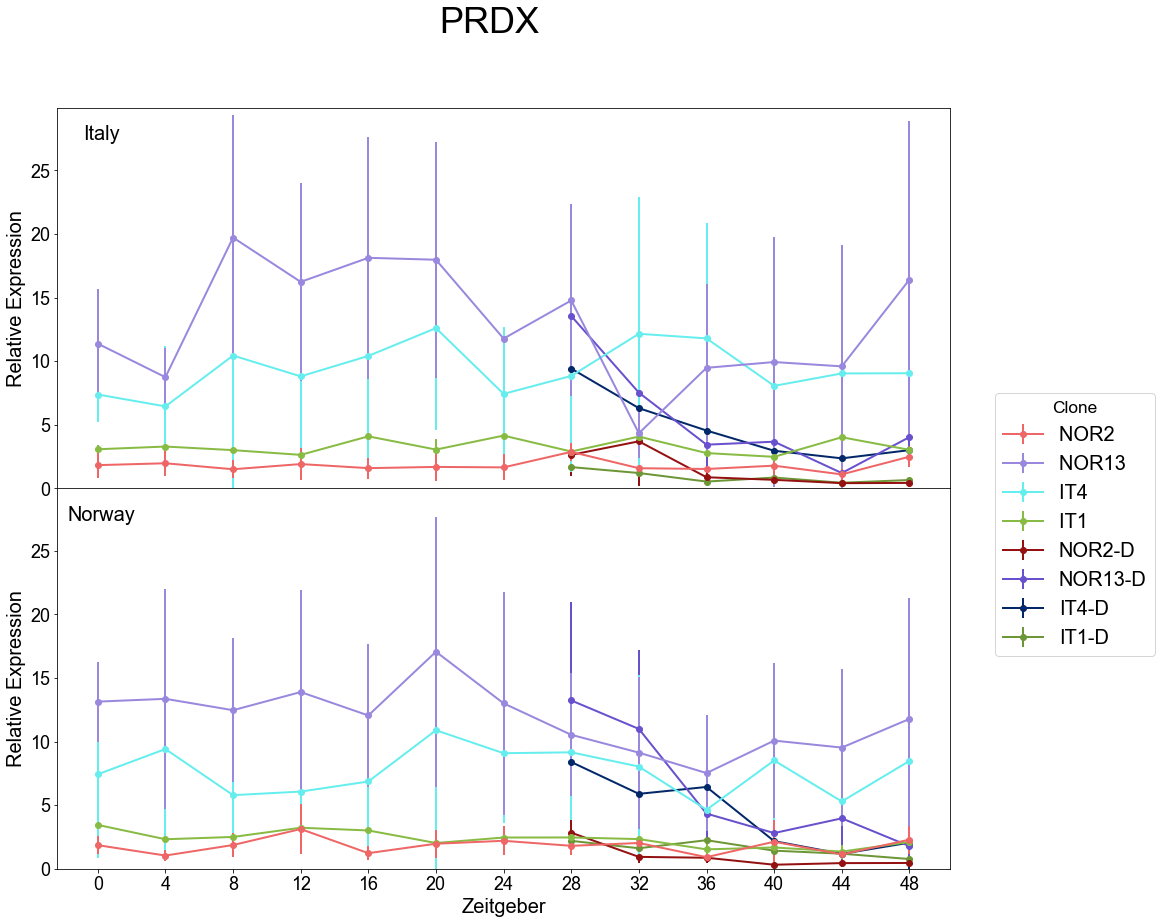

In [128]:
plot_gene(data2, 'PRDX')

In [166]:
peak_values(data2, 'PRDX')

2delta_Cq                            
                   idxmin       min idxmax        max
treatment Clone                                      
Norway    IT1          44  1.353020      0   3.451637
          IT4          36  4.643777     20  10.896332
          NOR13        36  7.527572     20  17.070896
          NOR2         36  0.915670     12   3.125285
Italy     IT1          40  2.473601     24   4.142152
          IT4           4  6.439691     20  12.596118
          NOR13        32  4.327541      8  19.718511
          NOR2         44  1.091182     28   2.863397
D-Norway  IT1          48  0.768642     36   2.248990
          IT4          44  1.175784     28   8.397805
          NOR13        48  1.782299     28  13.239735
          NOR2         40  0.320821     28   2.840999
D-Italy   IT1          44  0.434624     28   1.666523
          IT4          44  2.354116     28   9.414234
          NOR13        44  1.197401     28  13.549361
          NOR2         44  0.402245     32   3.692068

In [167]:
clone_anova(data2, 'PRDX')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,7734.627802,1.0,374.053661,5.544516e-52
"C(zeitgeber, Sum)",552.562808,12.0,2.226870,1.106057e-02
"C(treatment, Sum)",693.434938,3.0,11.178382,6.434342e-07
"C(Clone, Sum)",3660.871299,3.0,59.014359,4.945972e-29
"C(zeitgeber, Sum):C(treatment, Sum)",600.387823,36.0,0.806536,7.553919e-01
"C(zeitgeber, Sum):C(Clone, Sum)",663.664135,36.0,0.891539,6.498781e-01
"C(treatment, Sum):C(Clone, Sum)",320.773740,9.0,1.723657,8.390345e-02
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",992.549063,108.0,0.444450,9.999923e-01
Residual,5293.531173,256.0,NaN,NaN


In [168]:
tukey_treatment_groups(data2, 'PRDX')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2


## PRR5

C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\cfa024\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(<Figure size 1152x1008 with 2 Axes>,
 (<AxesSubplot:title={'center':'Italy'}, ylabel='Relative Expression'>,
  <AxesSubplot:title={'center':'Norway'}, xlabel='Zeitgeber', ylabel='Relative Expression'>))

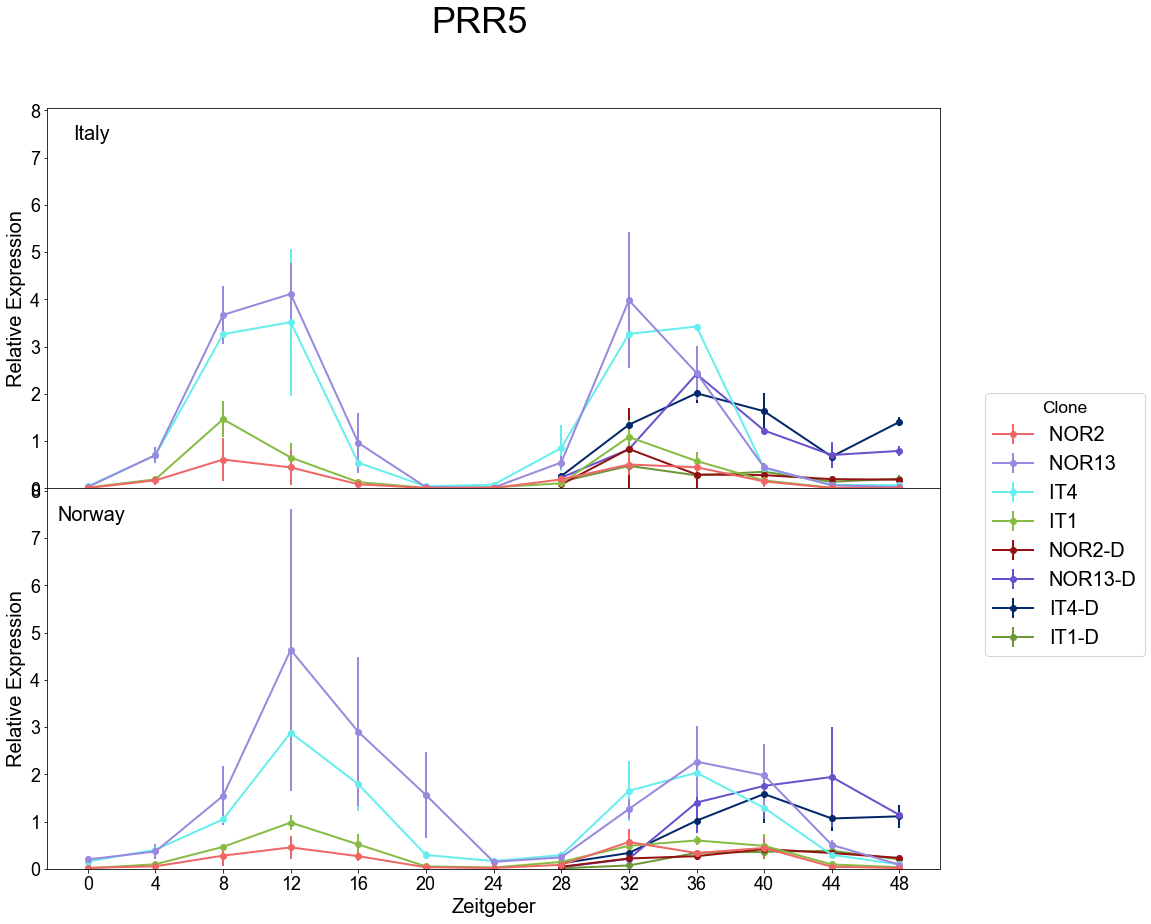

In [121]:
plot_gene(data2, 'PRR5')

In [145]:
peak_values(data2, 'PRR5')

2delta_Cq                           
                   idxmin       min idxmax       max
treatment Clone                                     
Norway    IT1           0  0.010315     12  0.979858
          IT4          48  0.092176     12  2.883047
          NOR13        48  0.085862     12  4.635045
          NOR2         48  0.016555     32  0.566926
Italy     IT1          20  0.009472      8  1.462824
          IT4           0  0.041219     12  3.517440
          NOR13        24  0.015122     12  4.115050
          NOR2         48  0.002849      8  0.608632
D-Norway  IT1          28  0.010436     44  0.381222
          IT4          28  0.116143     40  1.583956
          NOR13        28  0.034648     44  1.944121
          NOR2         28  0.043617     40  0.417875
D-Italy   IT1          44  0.138561     32  0.474298
          IT4          28  0.258118     36  2.011784
          NOR13        28  0.224832     36  2.419693
          NOR2         28  0.081432     32  0.832525

In [146]:
clone_anova(data2, 'PRR5')

C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 30
  warnings.warn('covariance of constraints does not have full '
C:\Users\cfa024\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 90
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,134.937407,1.0,656.926258,2.821655e-72
"C(zeitgeber, Sum)",120.798798,12.0,49.007847,5.179810e-59
"C(treatment, Sum)",2.480687,3.0,4.025641,8.023219e-03
"C(Clone, Sum)",53.457759,3.0,86.750853,1.249745e-38
"C(zeitgeber, Sum):C(treatment, Sum)",168.184870,36.0,22.744096,1.272922e-55
"C(zeitgeber, Sum):C(Clone, Sum)",57.863215,36.0,7.825000,7.929657e-25
"C(treatment, Sum):C(Clone, Sum)",3.631964,9.0,1.964641,4.385582e-02
"C(zeitgeber, Sum):C(treatment, Sum):C(Clone, Sum)",93.270371,108.0,4.204402,1.627185e-19
Residual,51.968031,253.0,NaN,NaN


In [147]:
tukey_treatment_groups(data2, 'PRR5')

Significant results for Norwegian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
199,3.6552,0.0000,1.5941,5.7162,True,12,IT1,NOR13
246,-2.4298,0.0245,-4.7341,-0.1255,True,12,IT4,NOR2
291,-4.1818,0.0000,-6.4861,-1.8775,True,12,NOR13,NOR2
381,2.3837,0.0057,0.3226,4.4447,True,16,IT1,NOR13
465,-2.6321,0.0070,-4.9365,-0.3278,True,16,NOR13,NOR2


Significant results for Italian treatment


,meandiff,p-adj,lower,upper,reject,zeitgeber,Clone_1,Clone_2
198,2.8662,0.0000,1.5731,4.1593,True,12,IT1,IT4
199,3.4639,0.0000,2.1708,4.7570,True,12,IT1,NOR13
246,-3.0756,0.0000,-4.5213,-1.6299,True,12,IT4,NOR2
291,-3.6732,0.0000,-5.1189,-2.2275,True,12,NOR13,NOR2
948,2.1824,0.0000,0.8893,3.4755,True,32,IT1,IT4
949,2.8961,0.0000,1.4503,4.3418,True,32,IT1,NOR13
976,-2.7656,0.0000,-4.0587,-1.4725,True,32,IT4,NOR2
1001,-3.4792,0.0000,-4.9250,-2.0335,True,32,NOR13,NOR2
1050,2.8462,0.0000,1.2625,4.4299,True,36,IT1,IT4
1051,1.8647,0.0007,0.4190,3.3104,True,36,IT1,NOR13
